In [2]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'

# 1. EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df

,user_id,age,country,city,reg_days,marketing_source,sessions_30d,sessions_90d,avg_session_duration_90d,median_pages_viewed_30d,...,support_tickets_2024,avg_csat_2024,emails_open_rate_90d,emails_click_rate_90d,review_count_2024,avg_review_stars_2024,rfm_recency,rfm_frequency,rfm_monetary,churn_label
0,U00001,20,Thailand,Bangkok,262,ads_fb,2,4,728.93,4.41,...,1,4.30,0.252,0.029,0,4.46,55,4,80.58,0
1,U00002,34,Indonesia,Jakarta,908,organic,2,6,671.11,7.75,...,0,4.27,0.388,0.023,0,4.79,59,2,49.11,0
2,U00003,31,Indonesia,Surabaya,406,referral,0,3,493.29,2.58,...,0,4.35,0.343,0.014,0,4.59,73,1,11.95,1
3,U00004,23,Malaysia,Johor Bahru,698,ads_fb,0,4,305.83,4.40,...,0,4.54,0.270,0.027,0,4.52,65,1,14.63,1
4,U00005,28,Vietnam,Ho Chi Minh City,650,influencer,1,7,946.16,6.04,...,0,4.04,0.212,0.073,1,4.79,68,5,116.32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U49996,19,Indonesia,Bandung,249,referral,0,1,658.04,5.37,...,0,4.27,0.474,0.061,0,4.00,54,3,83.44,0
49996,U49997,31,Thailand,Chiang Mai,872,organic,3,8,623.48,3.57,...,0,4.55,0.311,0.096,0,4.25,37,4,131.29,0
49997,U49998,22,Malaysia,Johor Bahru,794,referral,22,32,1142.82,13.33,...,0,4.34,0.639,0.125,8,4.96,4,39,752.37,0
49998,U49999,22,Malaysia,Johor Bahru,885,ads_fb,1,6,779.36,6.04,...,1,4.13,0.493,0.135,1,4.64,50,2,32.11,0


**Dataset Description: Customer Behavior and Churn Prediction**

This dataset contains user-level behavioral, transactional, and engagement information for churn analysis and customer lifetime value modeling.  
Each row represents one unique user.

| **Feature Name** | **Description** |
|------------------|-----------------|
| **user_id** | Unique identifier for each user. |
| **age** | User’s age in years. |
| **country** | Country where the user is located. |
| **city** | City of the user. |
| **reg_days** | Number of days since the user registered. |
| **marketing_source** | Original acquisition channel (e.g., `ads_fb`, `organic`, `referral`, etc.). |
| **sessions_30d** | Number of sessions (app or web visits) in the last 30 days. |
| **sessions_90d** | Number of sessions in the last 90 days. |
| **avg_session_duration_90d** | Average session duration over the last 90 days (in seconds). |
| **median_pages_viewed_30d** | Median number of pages viewed per session in the last 30 days. |
| **search_queries_30d** | Number of search queries made in the last 30 days. |
| **device_mix_ratio** | Normalized ratio indicating device usage diversity (e.g., mobile vs desktop). |
| **app_version_major** | Major version of the mobile app currently used by the customer. |
| **orders_30d** | Number of completed orders in the last 30 days. |
| **orders_90d** | Number of completed orders in the last 90 days. |
| **orders_2024** | Total number of orders placed during the year 2024. |
| **aov_2024** | Average Order Value (AOV) for the year 2024. |
| **gmv_2024** | Gross Merchandise Value (GMV) — total transaction value in 2024. |
| **category_diversity_2024** | Number of distinct product categories purchased in 2024. |
| **days_since_last_order** | Number of days since the user’s most recent order. |
| **discount_rate_2024** | Average discount rate applied to the user’s orders during 2024. |
| **refunds_count_2024** | Total number of refunded orders in 2024. |
| **refund_rate_2024** | Ratio of refunded orders to total orders in 2024. |
| **support_tickets_2024** | Number of support tickets submitted by the user in 2024. |
| **avg_csat_2024** | Average Customer Satisfaction (CSAT) score in 2024 (typically 1–5). |
| **emails_open_rate_90d** | Email open rate over the last 90 days. |
| **emails_click_rate_90d** | Email click-through rate over the last 90 days. |
| **review_count_2024** | Number of product or service reviews written by the user in 2024. |
| **avg_review_stars_2024** | Average review star rating given by the user in 2024. |
| **rfm_recency** | Recency score — time elapsed since the last purchase (smaller = more recent). |
| **rfm_frequency** | Frequency score — total number of purchases within a given period. |
| **rfm_monetary** | Monetary score — total spending amount associated with the user. |
| **churn_label** | Binary target variable: `1` = churned user, `0` = active user. |

---

In [5]:
print(df.shape)

(50000, 33)


In [5]:
print(df.columns[0])

user_id


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   50000 non-null  object 
 1   age                       50000 non-null  int64  
 2   country                   50000 non-null  object 
 3   city                      50000 non-null  object 
 4   reg_days                  50000 non-null  int64  
 5   marketing_source          50000 non-null  object 
 6   sessions_30d              50000 non-null  int64  
 7   sessions_90d              50000 non-null  int64  
 8   avg_session_duration_90d  50000 non-null  float64
 9   median_pages_viewed_30d   50000 non-null  float64
 10  search_queries_30d        50000 non-null  int64  
 11  device_mix_ratio          50000 non-null  float64
 12  app_version_major         50000 non-null  object 
 13  orders_30d                50000 non-null  int64  
 14  orders

In [7]:
print(df.isnull().sum())

user_id                     0
age                         0
country                     0
city                        0
reg_days                    0
marketing_source            0
sessions_30d                0
sessions_90d                0
avg_session_duration_90d    0
median_pages_viewed_30d     0
search_queries_30d          0
device_mix_ratio            0
app_version_major           0
orders_30d                  0
orders_90d                  0
orders_2024                 0
aov_2024                    0
gmv_2024                    0
category_diversity_2024     0
days_since_last_order       0
discount_rate_2024          0
refunds_count_2024          0
refund_rate_2024            0
support_tickets_2024        0
avg_csat_2024               0
emails_open_rate_90d        0
emails_click_rate_90d       0
review_count_2024           0
avg_review_stars_2024       0
rfm_recency                 0
rfm_frequency               0
rfm_monetary                0
churn_label                 0
dtype: int

## 1.1 Target Variable (Churn Label)

In [8]:
churn_counts = df['churn_label'].value_counts()
churn_labels = ['Active (0)', 'Churned (1)']

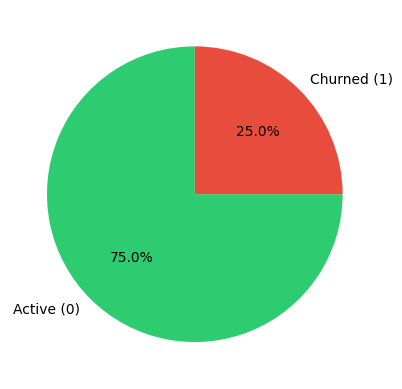

In [9]:
plt.pie(
    churn_counts,
    labels=churn_labels,
    autopct='%1.1f%%',     
    startangle=90,           
    colors=['#2ecc71', '#e74c3c'], 
)
plt.show()

The target variable is imbalanced

## 1.2 Age, Country, Marketing_source, App_version_major

In [10]:
print(df['age'].describe())

count    50000.000000
mean        26.028520
std          4.903528
min         18.000000
25%         22.000000
50%         26.000000
75%         30.000000
max         34.000000
Name: age, dtype: float64


In [11]:
print(df['country'].unique())

['Thailand' 'Indonesia' 'Malaysia' 'Vietnam' 'Philippines']


In [12]:
def col_churn_pct_plot(col_name):
    churn_pct_pivot = pd.crosstab(df[col_name], df['churn_label'], normalize='index') * 100
    churn_pct_pivot.plot(
        kind='bar',
        stacked=True,
        figsize=(12, 6),
        color=['#2ecc71', '#e74c3c']
    )

    plt.title(f"Churn Percentage by {col_name}", fontsize=16, fontweight='bold')
    plt.xlabel(col_name, fontsize=12)
    plt.ylabel("Percentage (%)", fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title="Churn Label", labels=["Active (0)", "Churned (1)"])
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

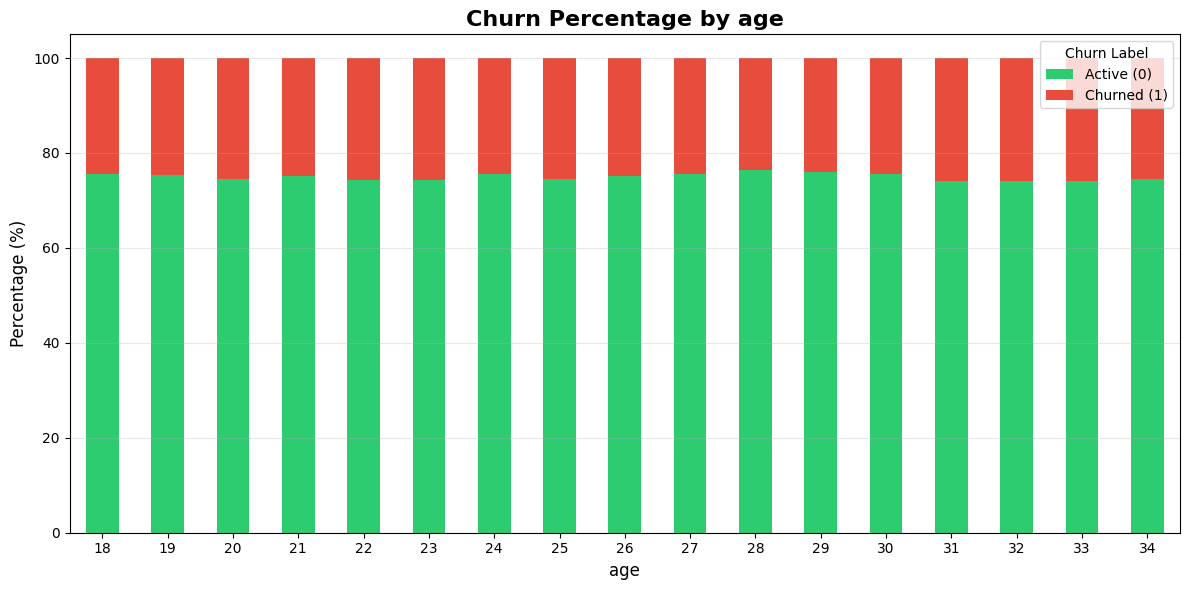

In [13]:
col_churn_pct_plot('age')

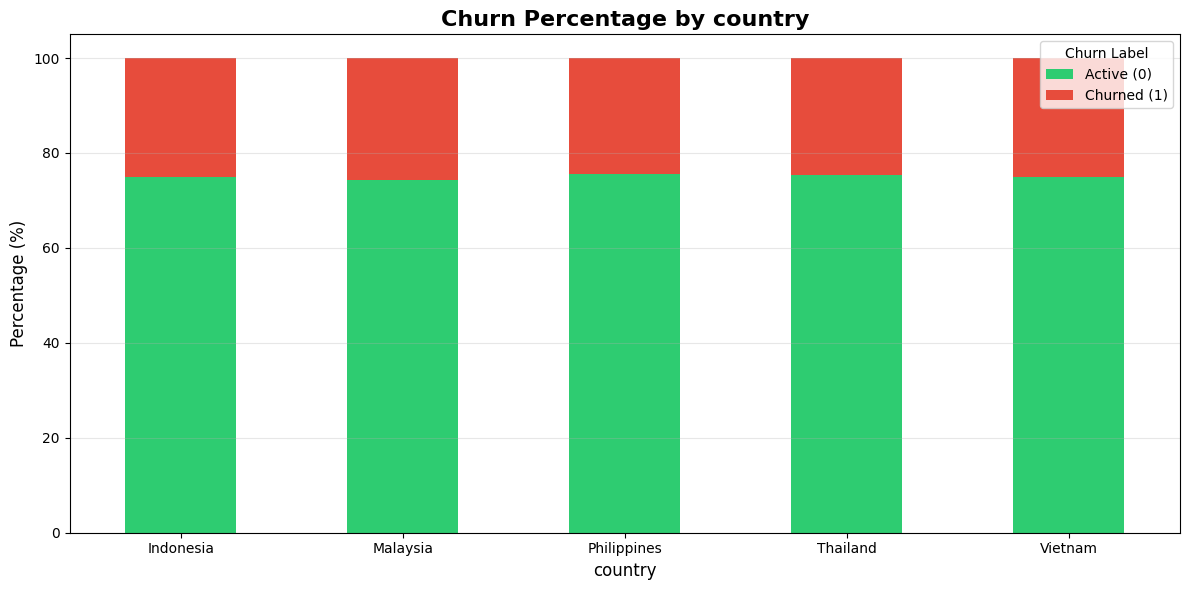

In [14]:
col_churn_pct_plot('country')

In [15]:
print(df['marketing_source'].unique())

['ads_fb' 'organic' 'referral' 'influencer' 'ads_ig']


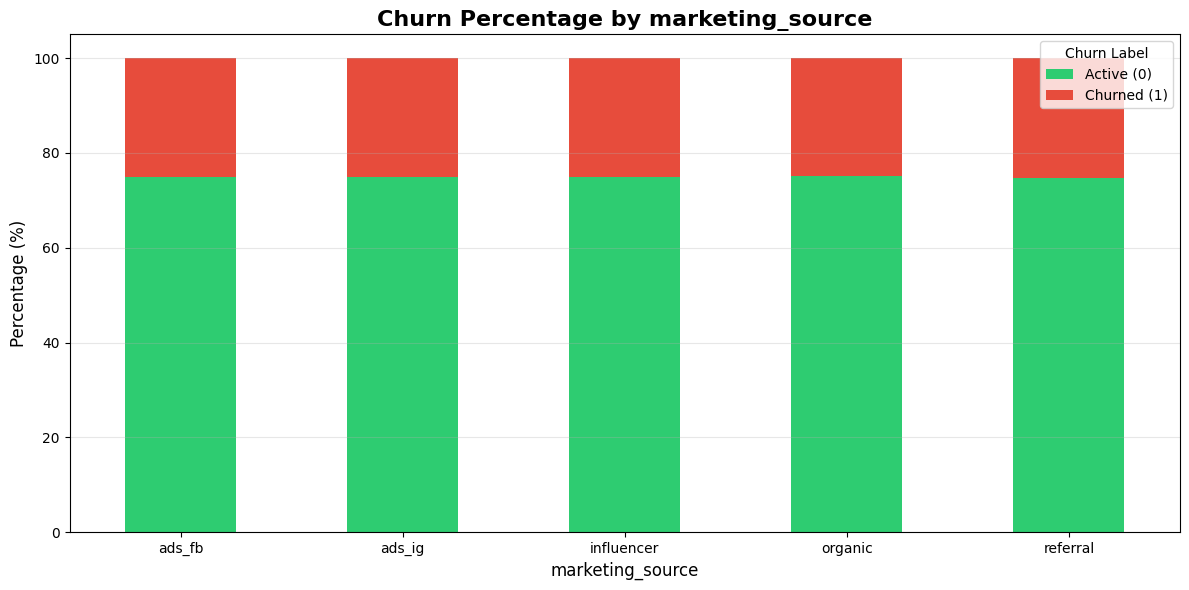

In [16]:
col_churn_pct_plot('marketing_source')

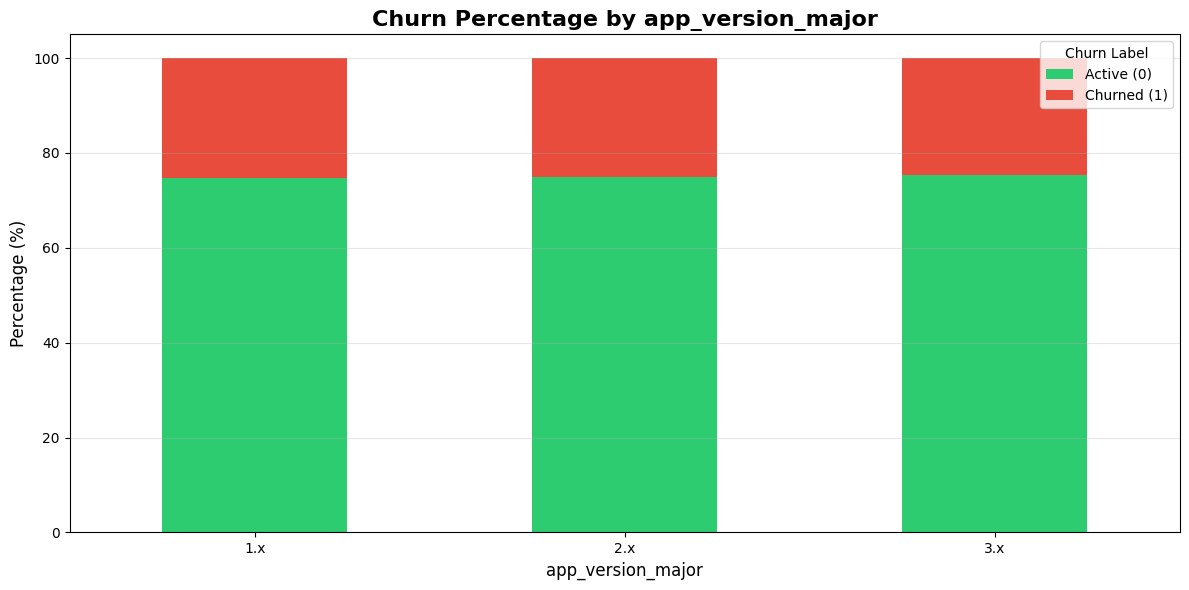

In [17]:
col_churn_pct_plot('app_version_major')

Since the churn percentage is nearly the same across all ages/ country, we can drop the 'age' and 'country' and 'city' column.
We also drop user_id because we will not use this feature.

In [18]:
df.drop(['user_id','age', 'country', 'city', 'marketing_source', 'app_version_major'], axis = 1, inplace=True)

In [19]:
print(df.columns)

Index(['reg_days', 'sessions_30d', 'sessions_90d', 'avg_session_duration_90d',
       'median_pages_viewed_30d', 'search_queries_30d', 'device_mix_ratio',
       'orders_30d', 'orders_90d', 'orders_2024', 'aov_2024', 'gmv_2024',
       'category_diversity_2024', 'days_since_last_order',
       'discount_rate_2024', 'refunds_count_2024', 'refund_rate_2024',
       'support_tickets_2024', 'avg_csat_2024', 'emails_open_rate_90d',
       'emails_click_rate_90d', 'review_count_2024', 'avg_review_stars_2024',
       'rfm_recency', 'rfm_frequency', 'rfm_monetary', 'churn_label'],
      dtype='object')


In [20]:
feature_col = df.drop(['churn_label'], axis = 1)

In [21]:
target_col = df['churn_label']

In [22]:
non_numeric_cols = feature_col.select_dtypes(exclude=[np.number]).columns
print(non_numeric_cols)

Index([], dtype='object')


## 1.3. Numeric features

In [23]:
def plot_hist_box(title:str,data:pd.DataFrame=feature_col):
    data_col = data[title]
    # log_data = np.log(data_col)
    print(f"Plot of {title}\n******")
    # Histogram
    plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    sns.histplot(data_col.dropna(), bins=50, kde=True, color='teal')
    plt.title("Histogram of " + title)
    plt.xlabel(title)
    plt.ylabel("Count")
    plt.xlim(0, data_col.max() * 1.1)

    # # Histogram log
    # plt.subplot(122)
    # sns.histplot(log_data, bins=50, kde=True, color='teal')
    # plt.title("Histogram of Log " + title)
    # plt.xlabel(f"Log({title})")
    # plt.ylabel("Count")
    # plt.xlim(0, log_data.max() * 1.1)
    # plt.tight_layout()
    # plt.show()

    # Boxplot
    plt.subplot(122)
    plt.boxplot(data_col, vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red'))
    plt.xlabel(title)
    plt.title("Boxplot of " + title)
    plt.tight_layout()
    plt.show()


Plot of reg_days
******


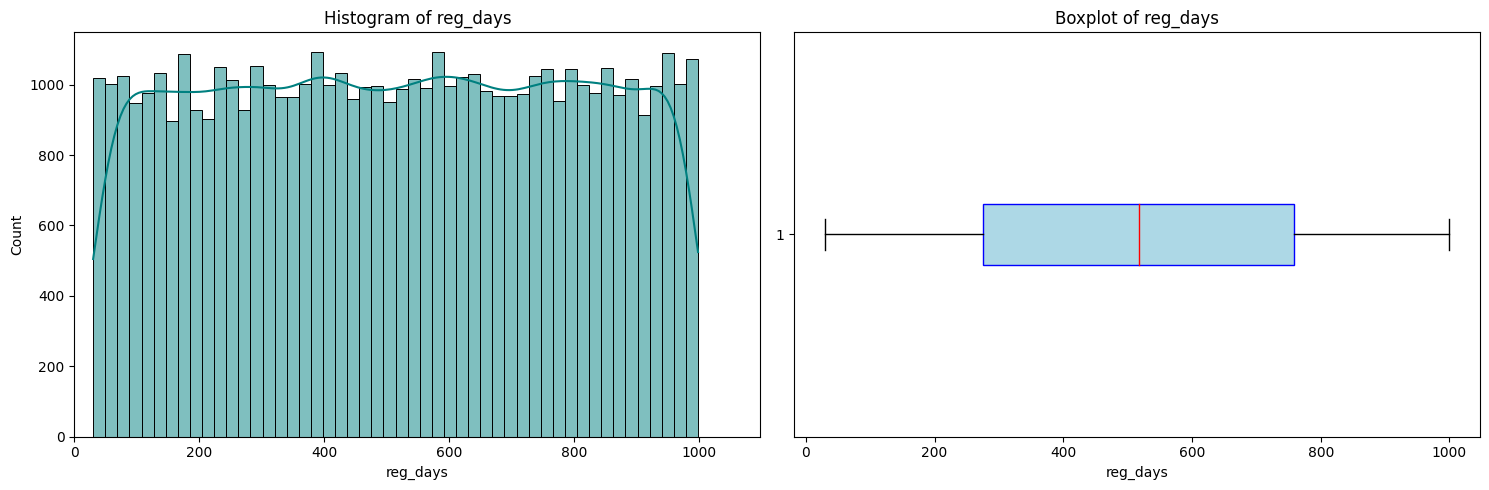

Plot of sessions_30d
******


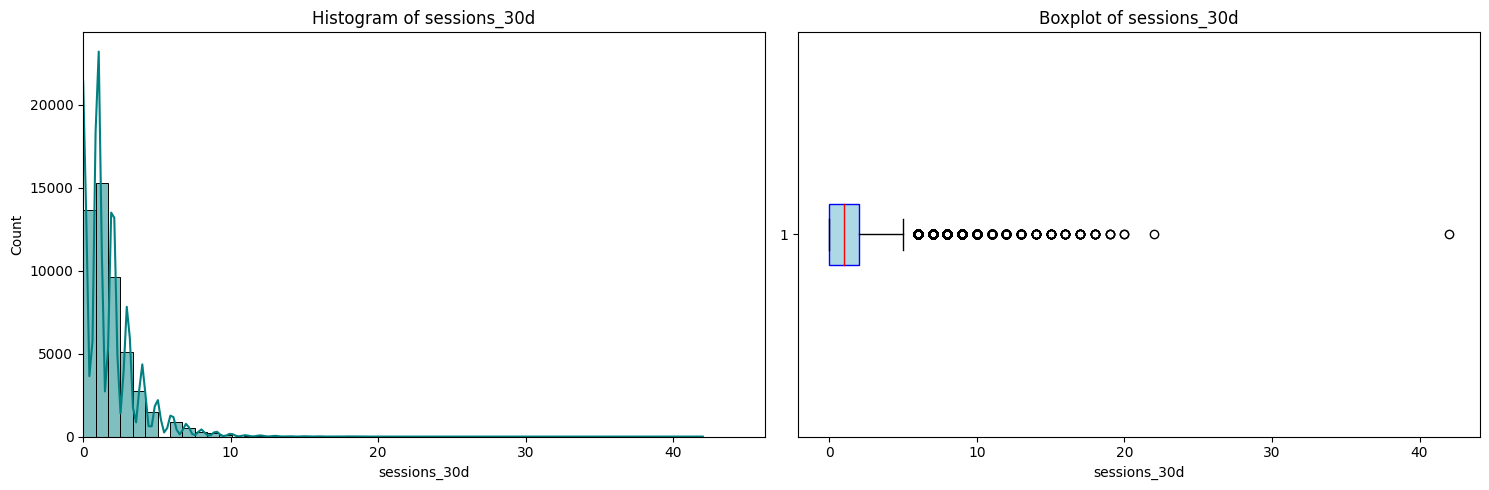

Plot of sessions_90d
******


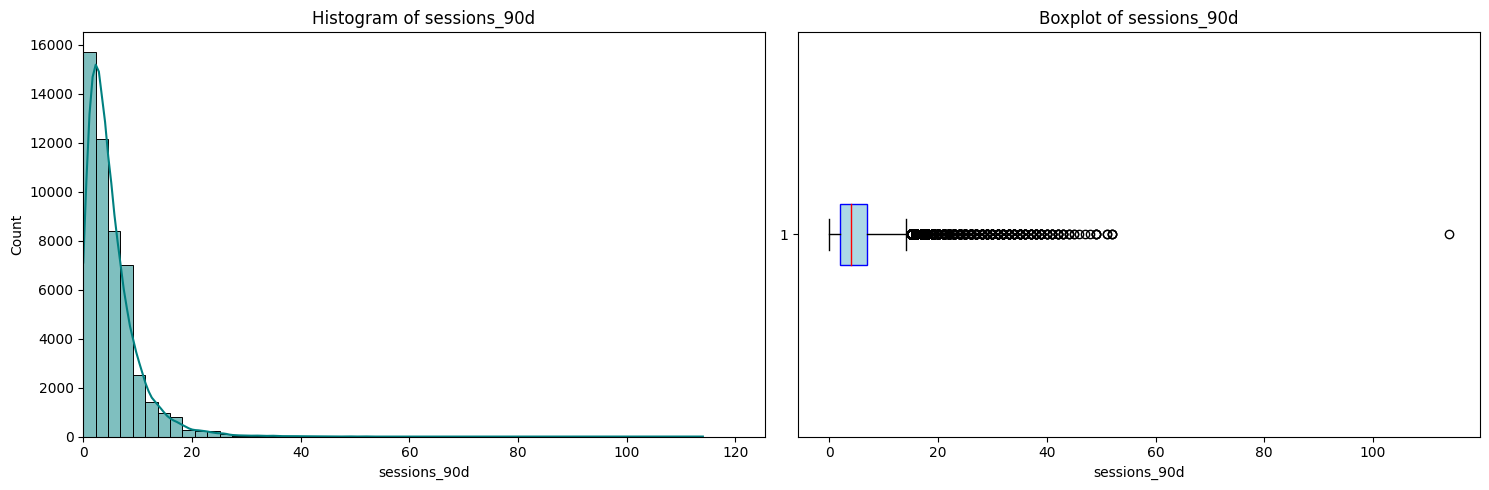

Plot of avg_session_duration_90d
******


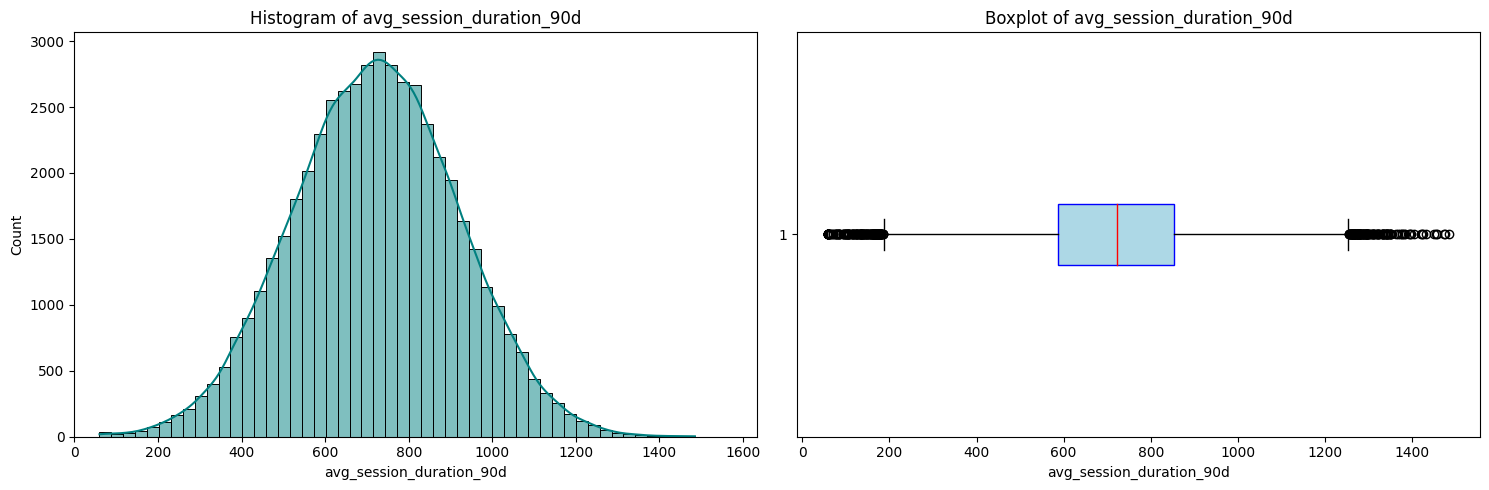

Plot of median_pages_viewed_30d
******


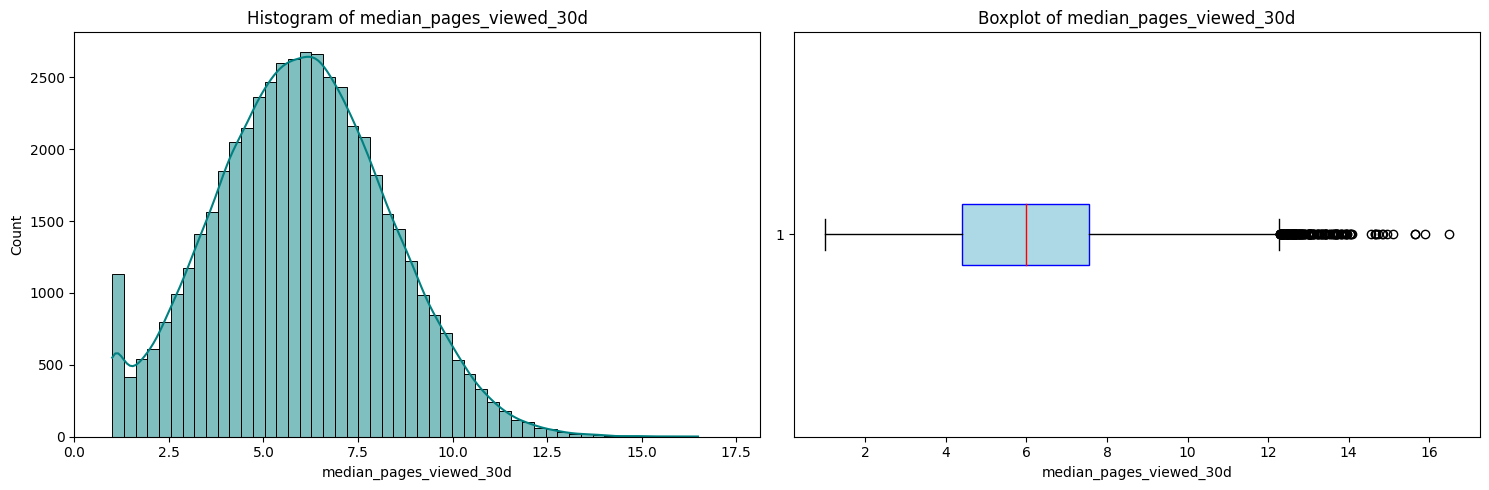

Plot of search_queries_30d
******


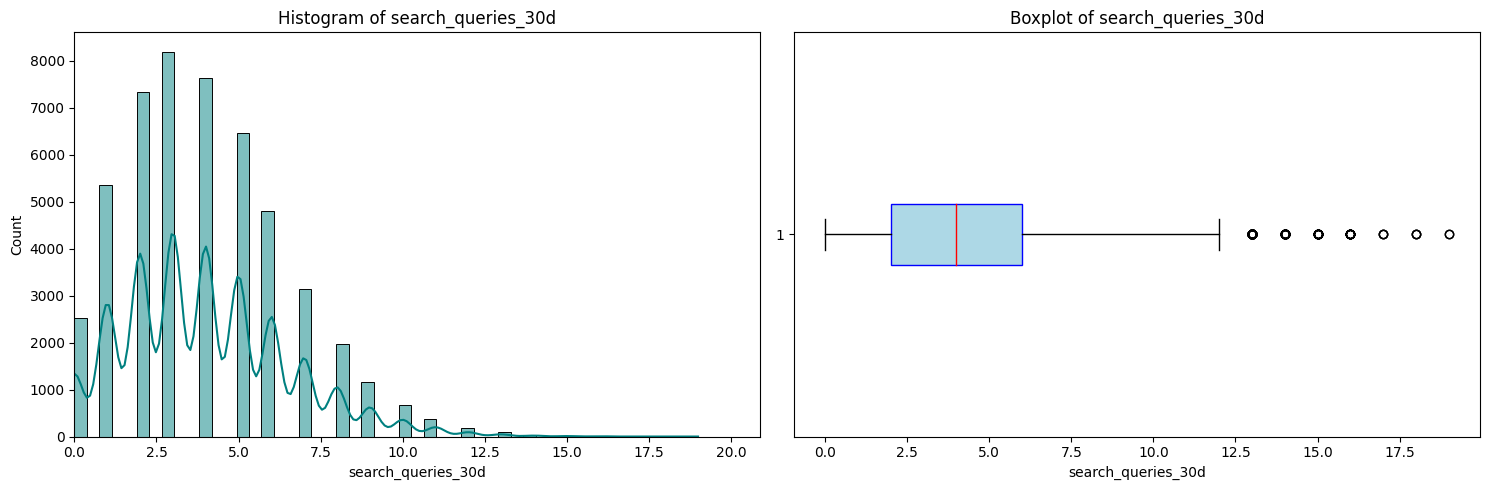

Plot of device_mix_ratio
******


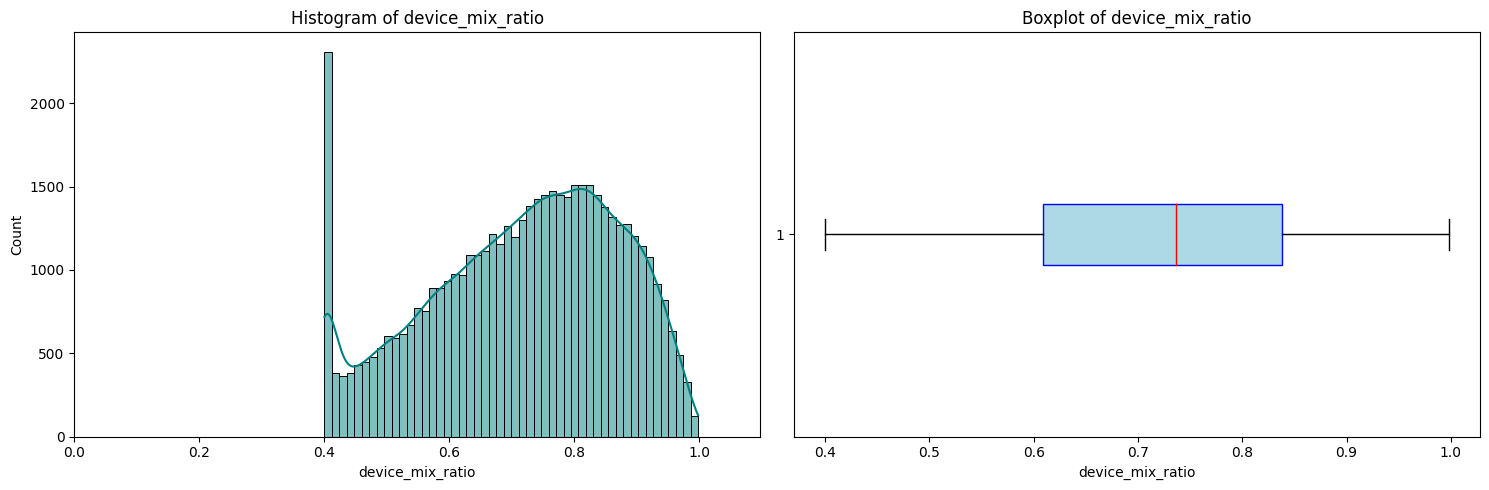

Plot of orders_30d
******


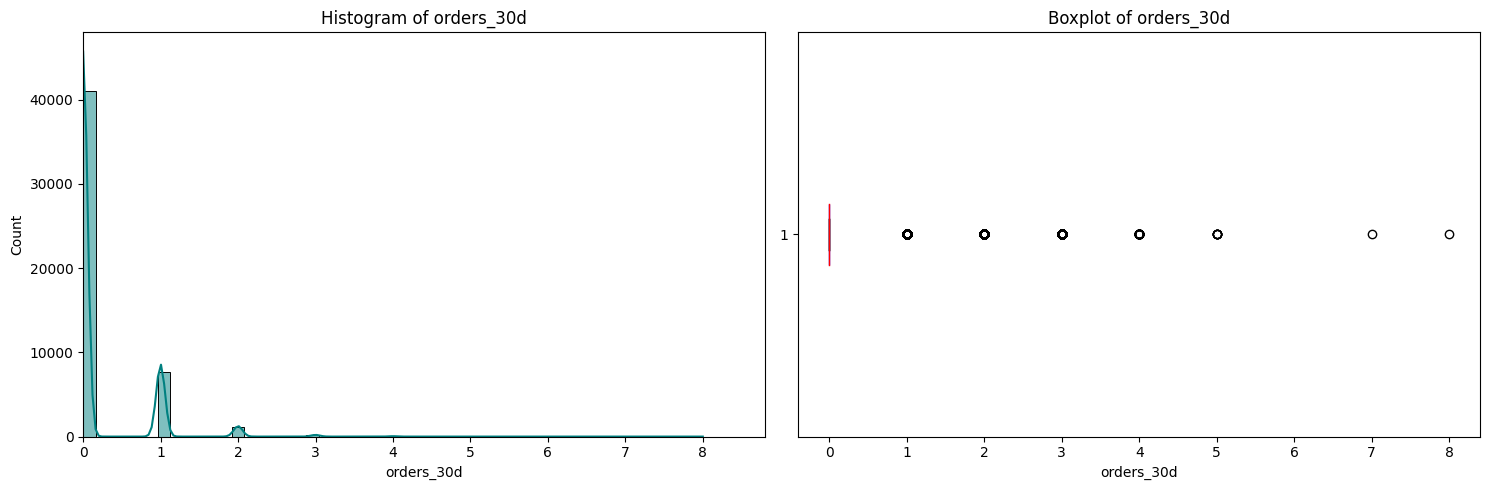

Plot of orders_90d
******


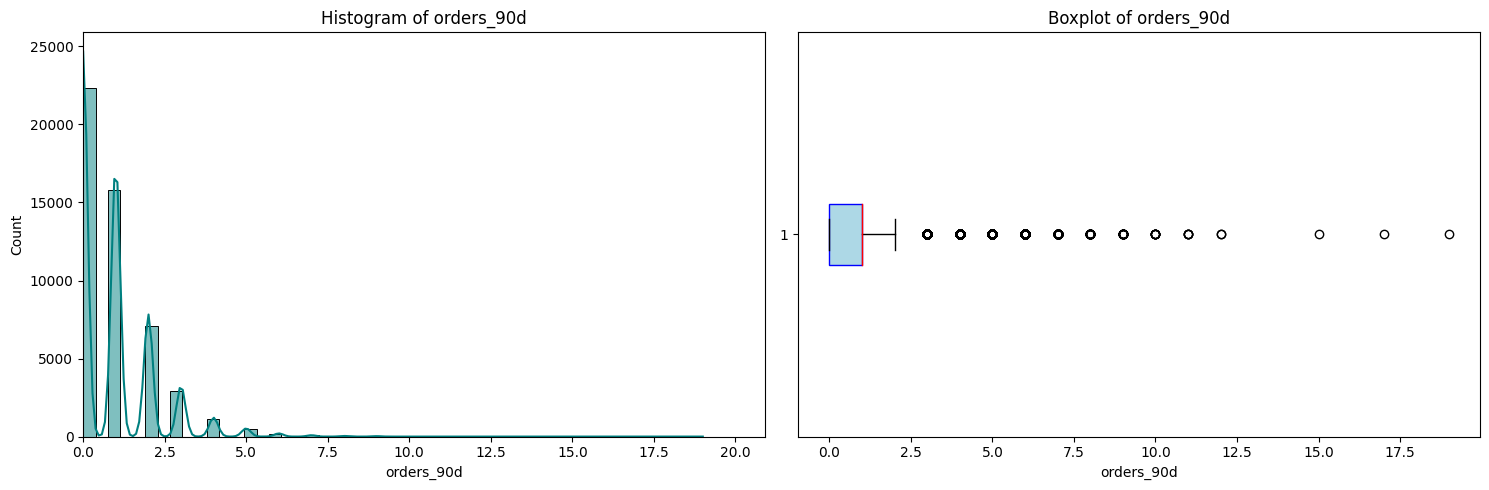

Plot of orders_2024
******


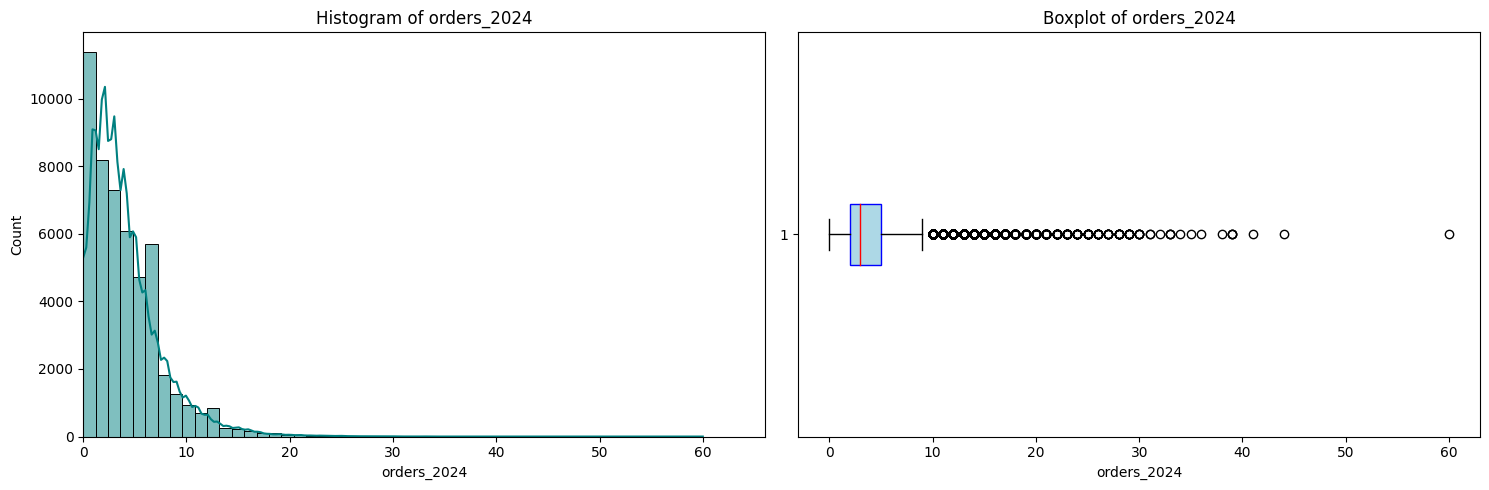

Plot of aov_2024
******


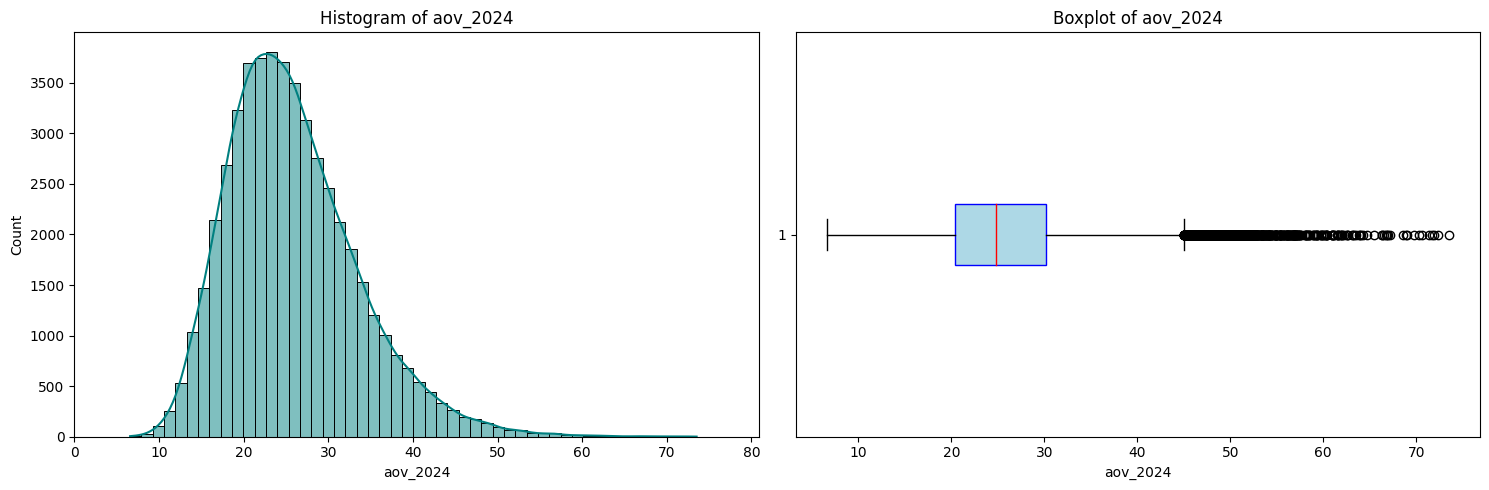

Plot of gmv_2024
******


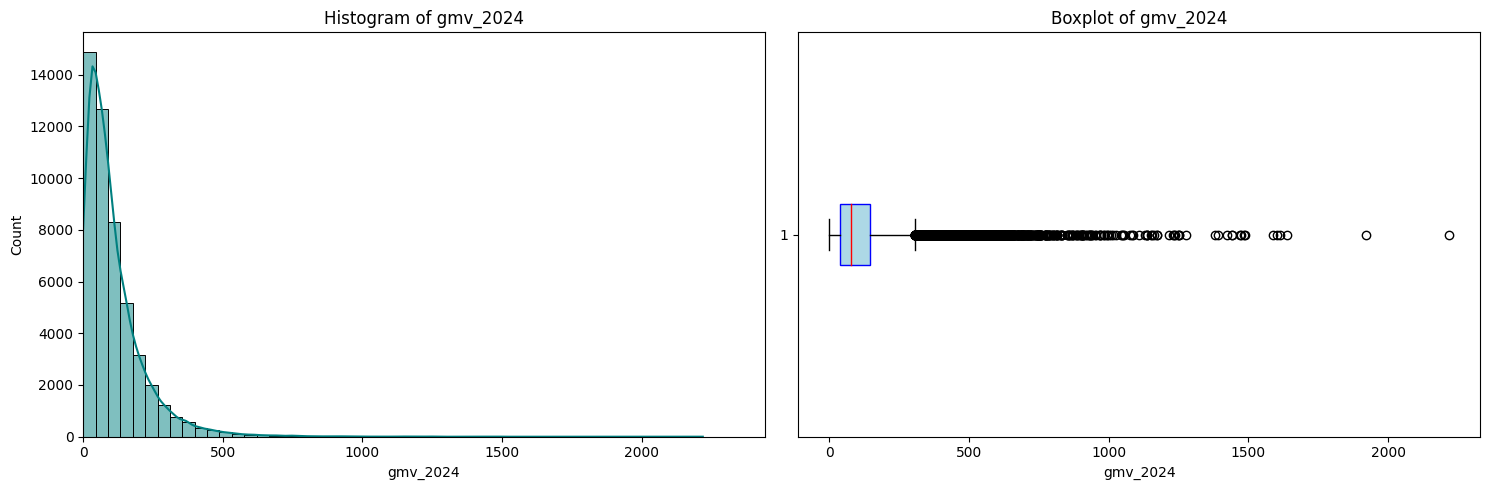

Plot of category_diversity_2024
******


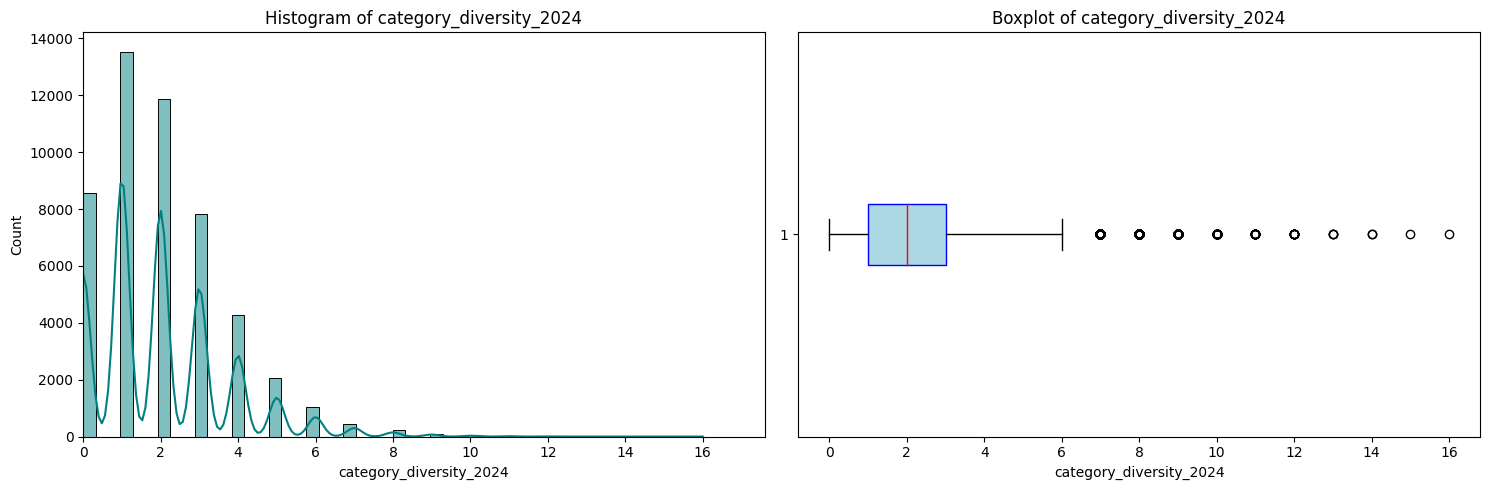

Plot of days_since_last_order
******


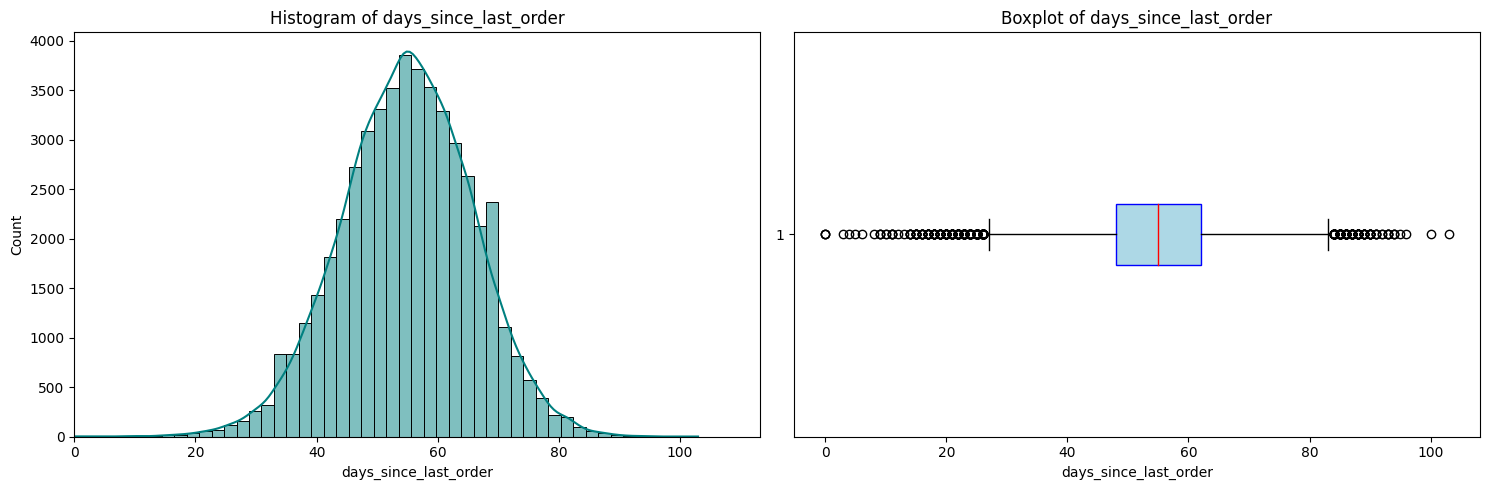

Plot of discount_rate_2024
******


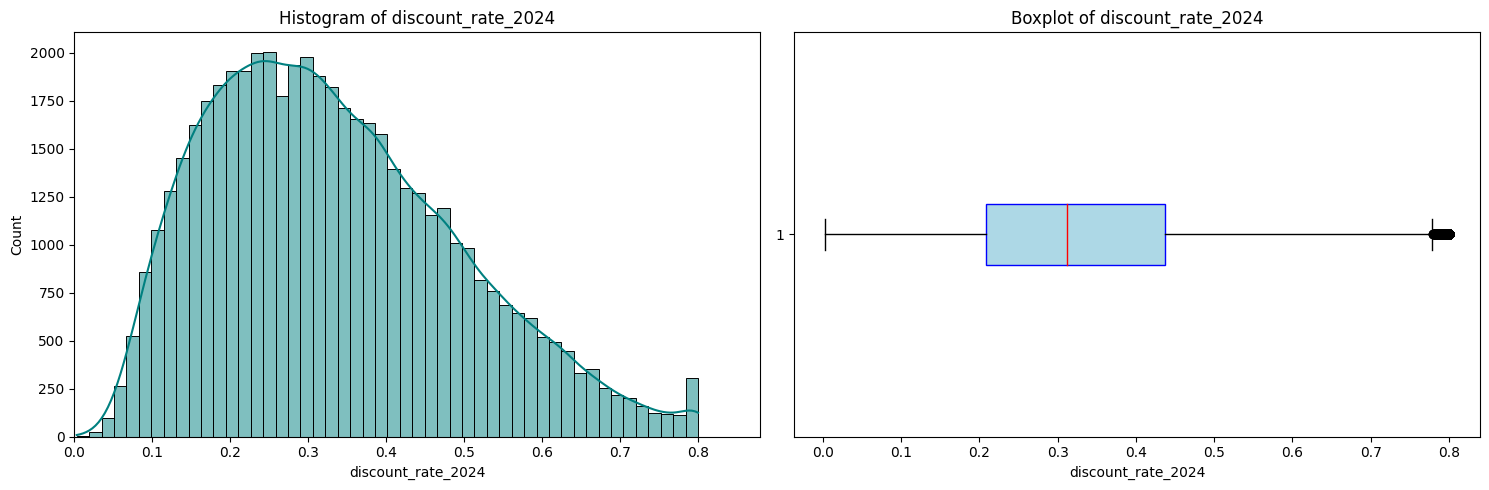

Plot of refunds_count_2024
******


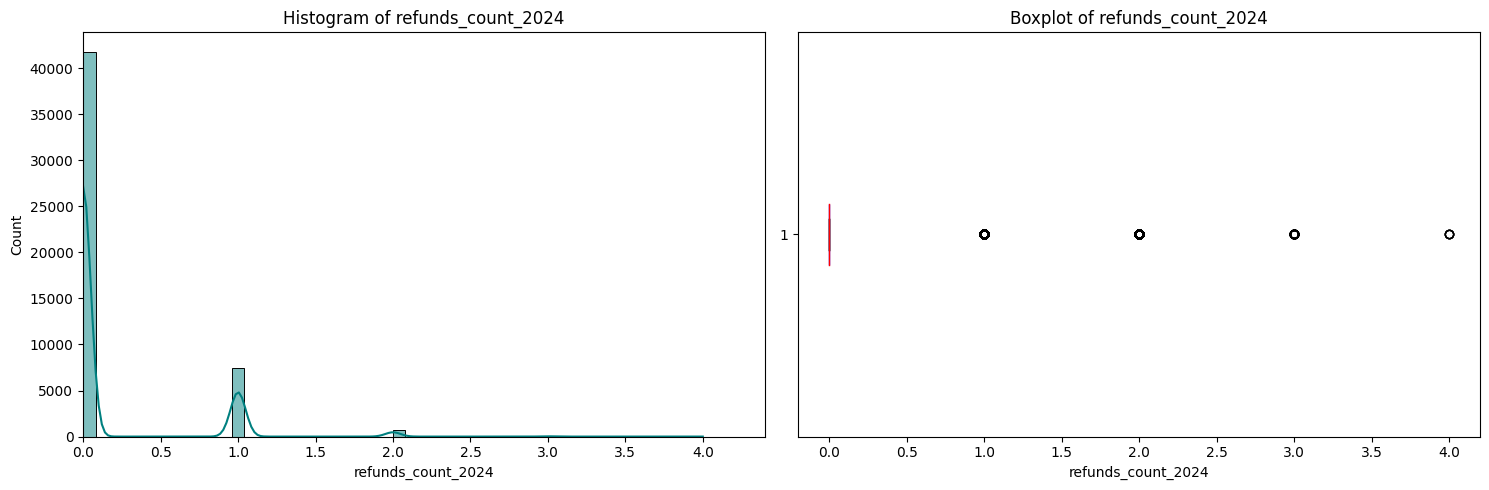

Plot of refund_rate_2024
******


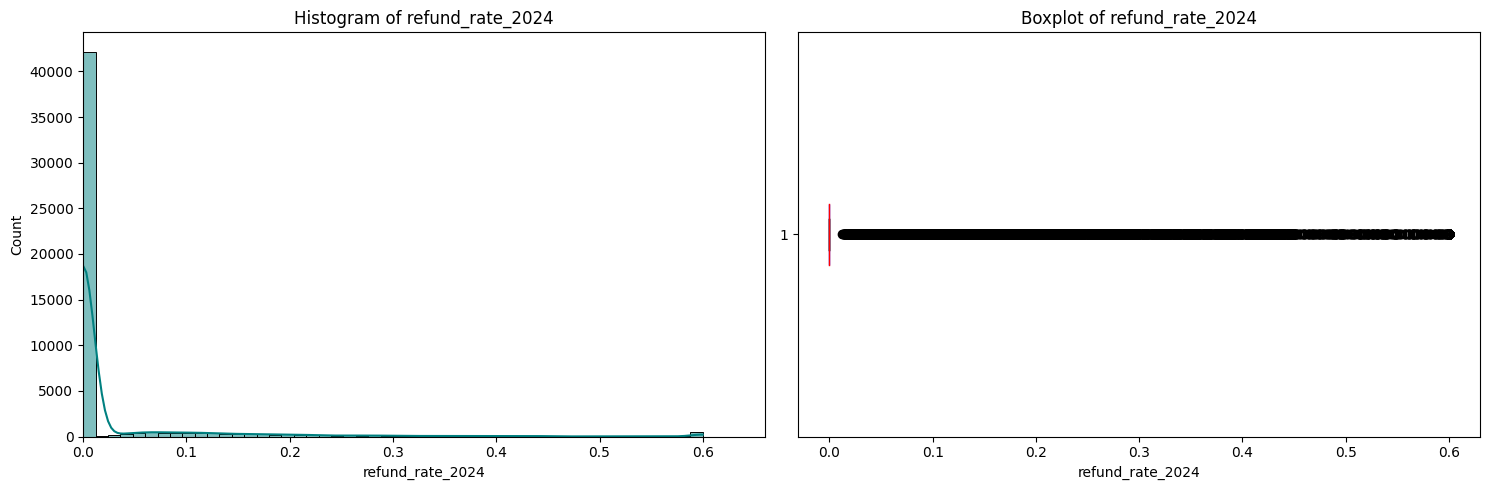

Plot of support_tickets_2024
******


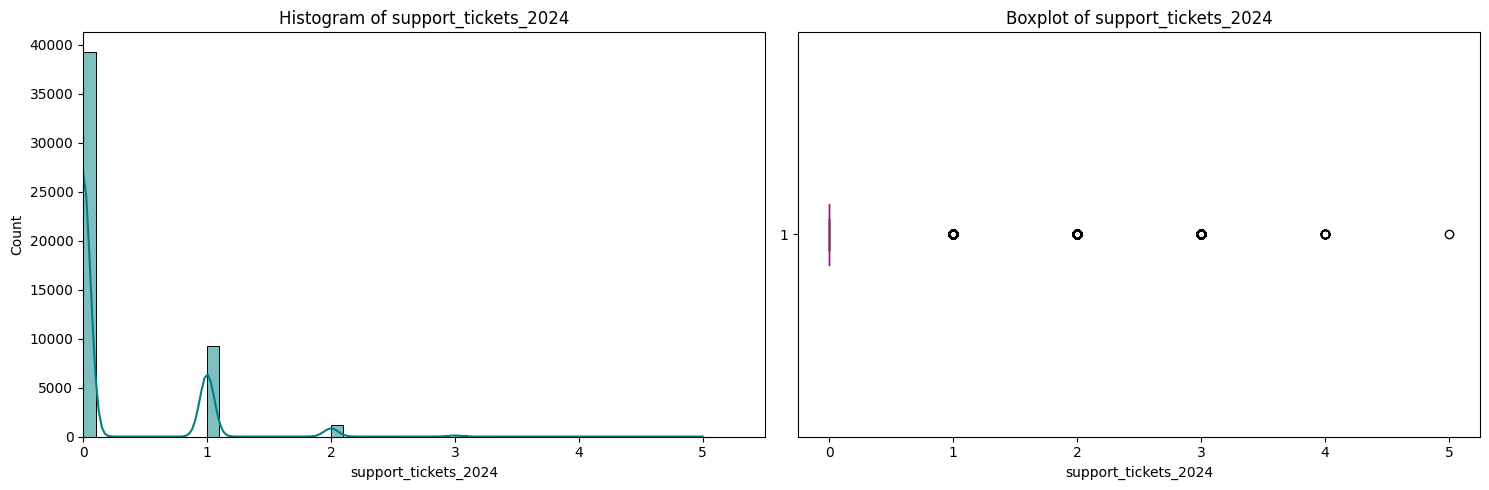

Plot of avg_csat_2024
******


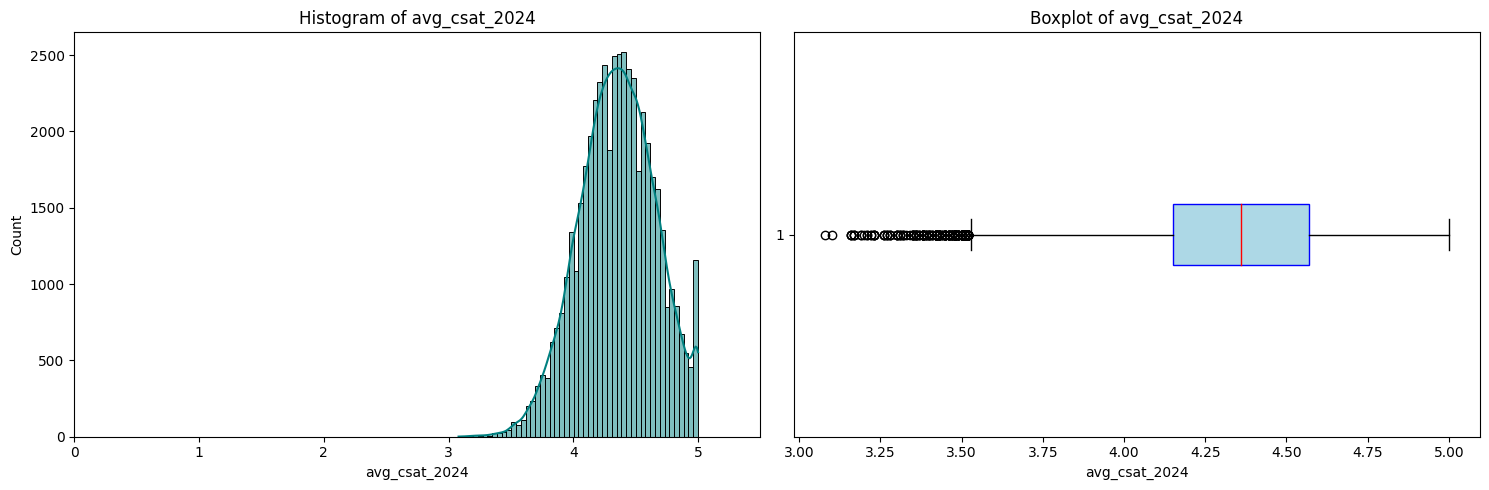

Plot of emails_open_rate_90d
******


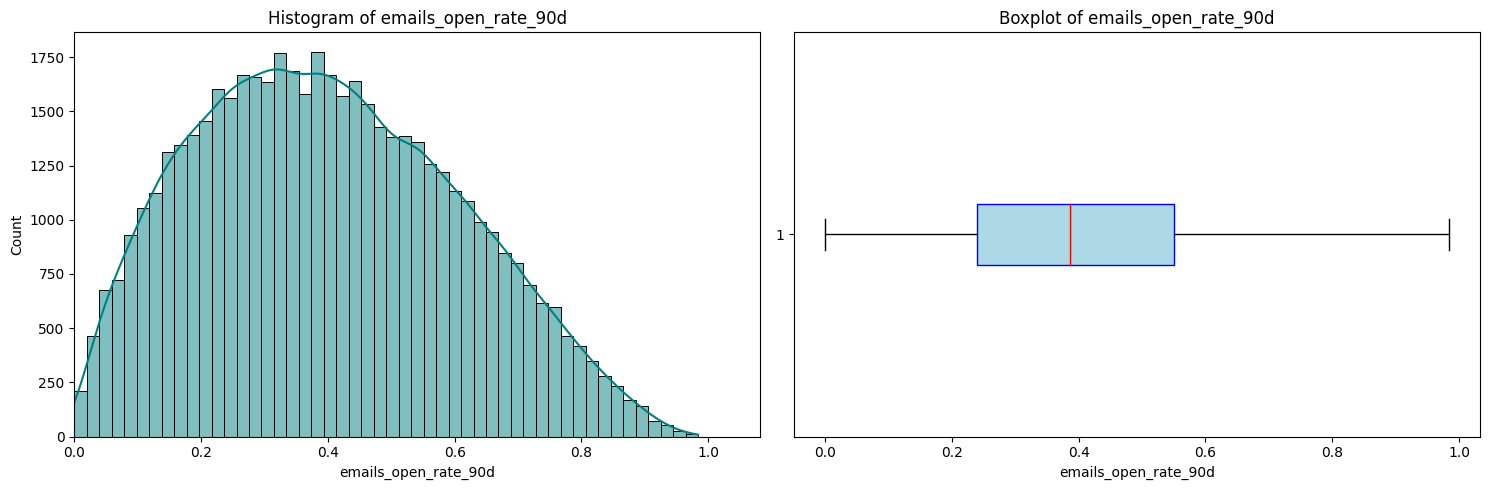

Plot of emails_click_rate_90d
******


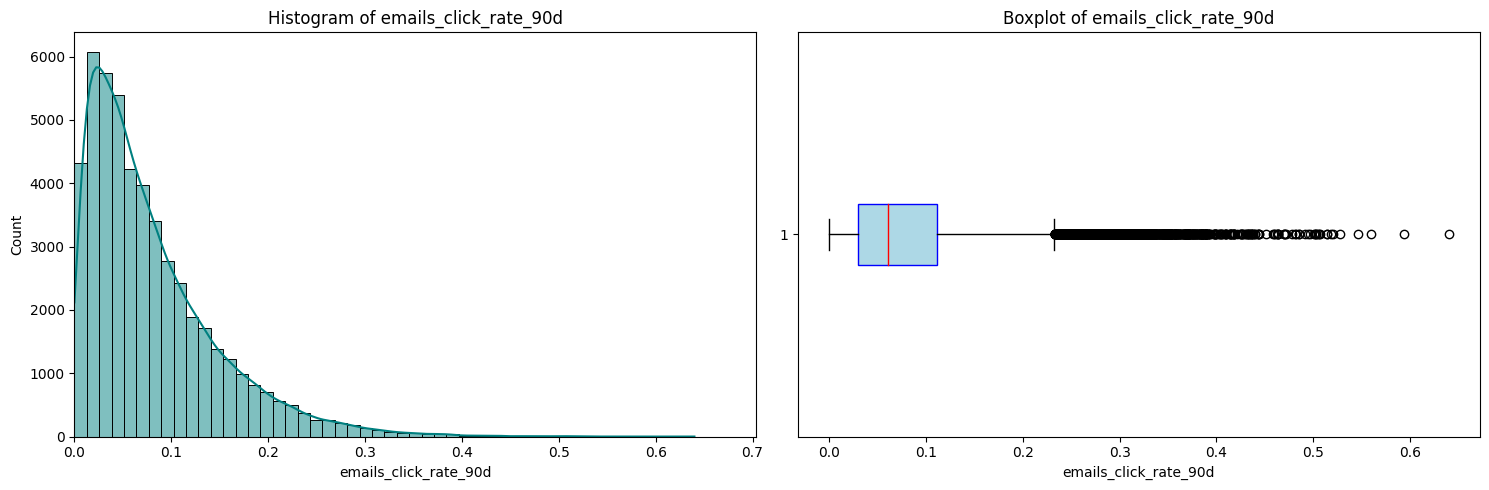

Plot of review_count_2024
******


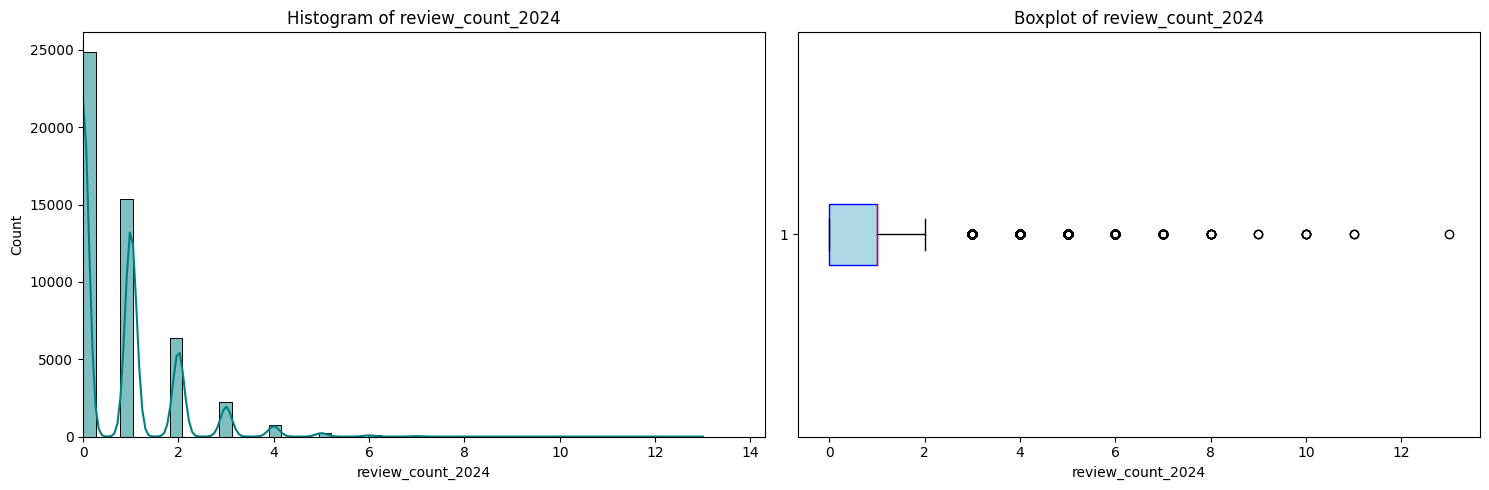

Plot of avg_review_stars_2024
******


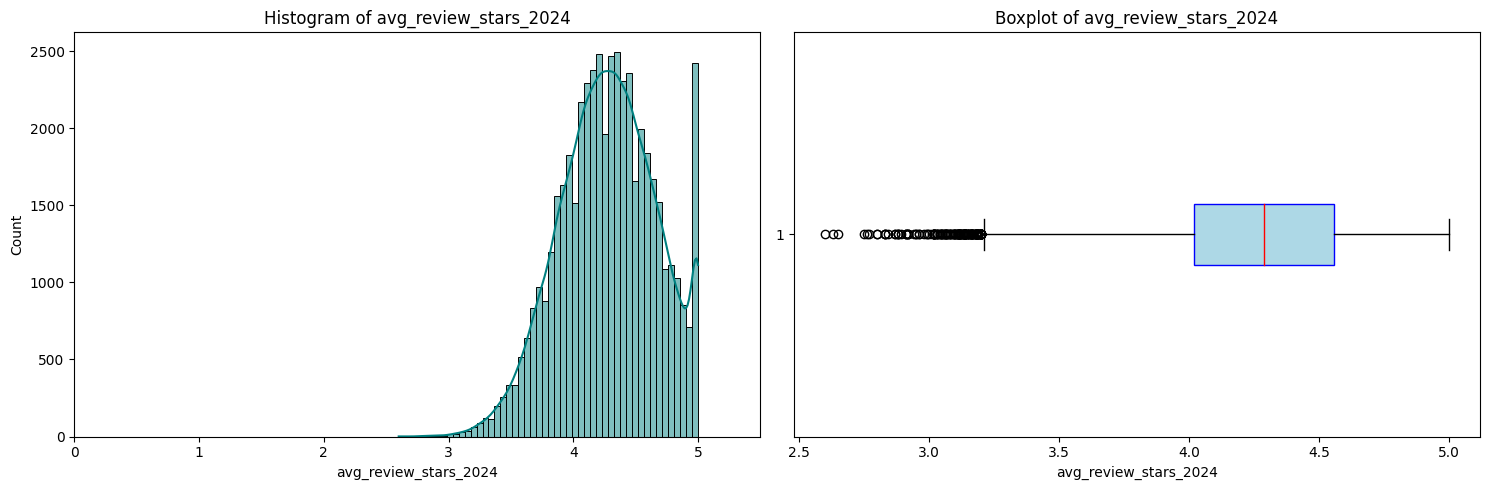

Plot of rfm_recency
******


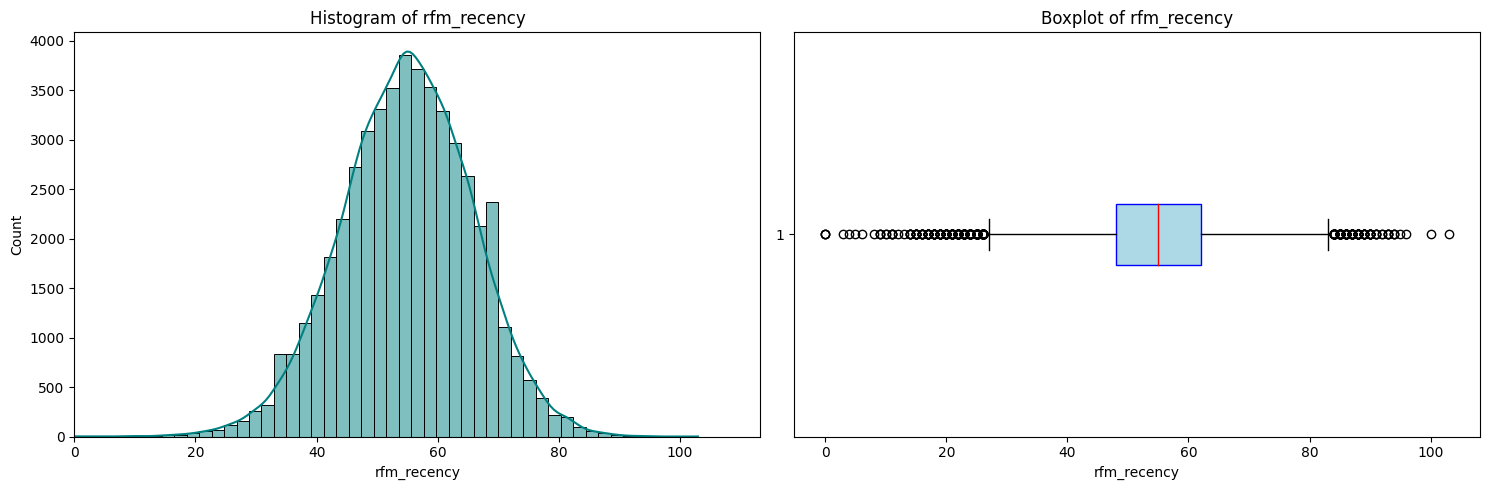

Plot of rfm_frequency
******


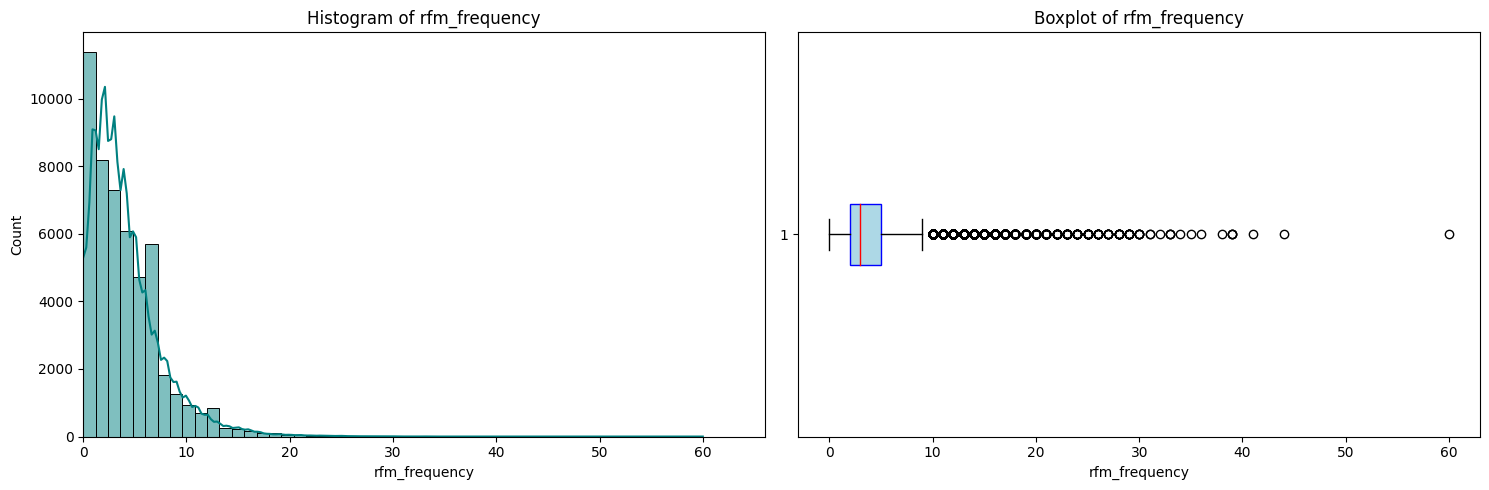

Plot of rfm_monetary
******


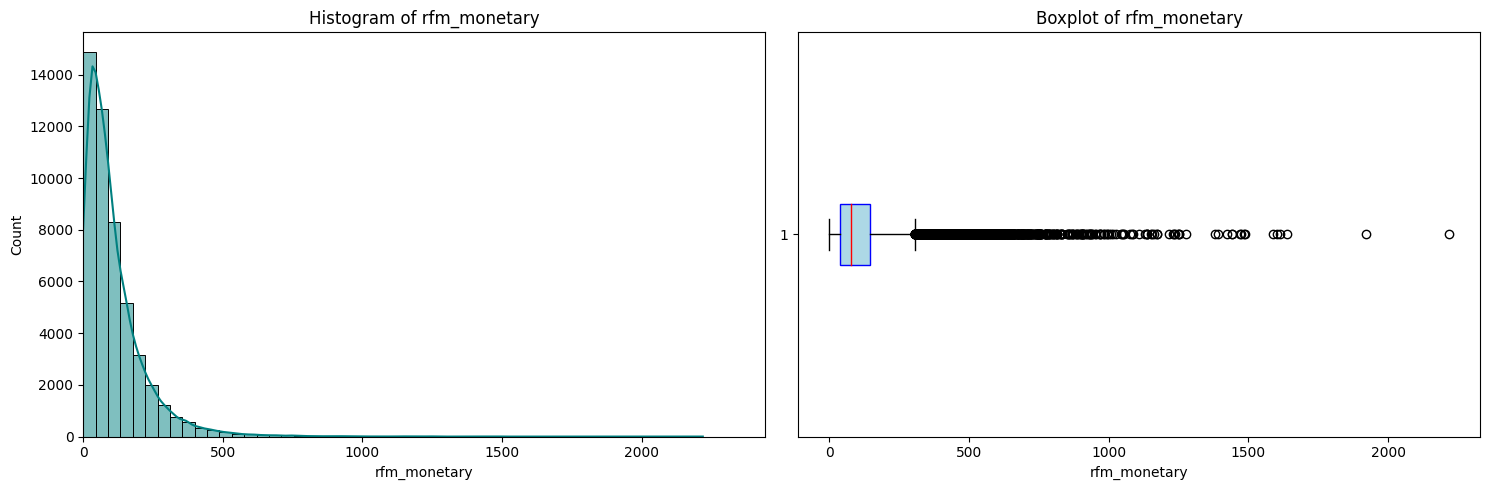

In [24]:
for col_name in feature_col.columns:
    plot_hist_box(col_name, feature_col)

**Log and Clip function**

Because sessions_30d and sessions_90d is right-skewed, so we use log(1+x) and clip to ease the effect of extreme value in the data

In [25]:
def log_feature(col_name, df = feature_col):
    df[f"{col_name}_log"] = np.log1p(df[col_name])

def clip_feature(col_name, df = feature_col, low = 0.01, high = 0.99):
    q_low, q_high = df[col_name].quantile([low, high])
    df[col_name] = df[col_name].clip(lower=q_low, upper=q_high)

Plot of sessions_30d_log
******


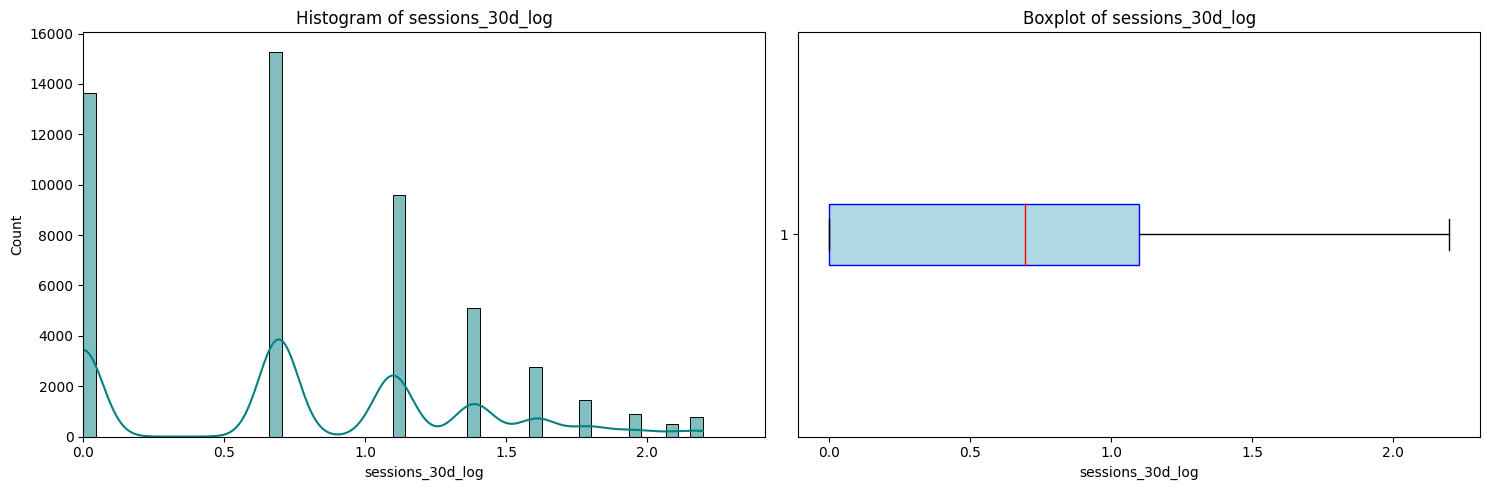

In [26]:
log_feature('sessions_30d')
clip_feature('sessions_30d_log')
plot_hist_box('sessions_30d_log')

Plot of sessions_90d_log
******


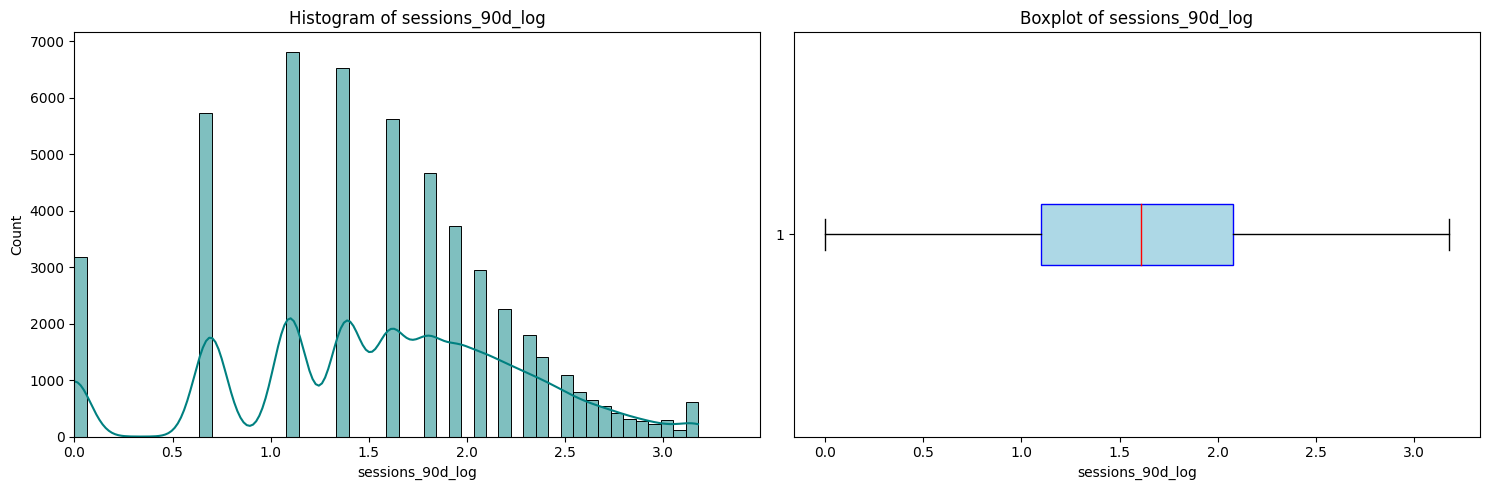

In [27]:
log_feature('sessions_90d')
clip_feature('sessions_90d_log')
plot_hist_box('sessions_90d_log')

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def standard_scale(col_name: str, df: pd.DataFrame=feature_col):
    df[f"col_name_scaled"] = scaler.fit_transform(df[col_name]) 

In [29]:
# Remove outlier with IQR
def iqr_remove_outlier(col_name, df = feature_col):
    # Remove outliers using IQR method
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    df[f"{col_name}_iqr"] = df[col_name].where(
        (df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)
    )

In [30]:
#The data in "avg_session_duration_90d" and "median_pages_viewed_30d" follows a roughly normal distribution but is slightly right-skewed, 
# with a few outliers on the higher end representing highly active users. 
# We will apply soft clipping to preserve information about this user group while reducing the influence of extreme values.
clip_feature('avg_session_duration_90d')

Plot of avg_session_duration_90d
******


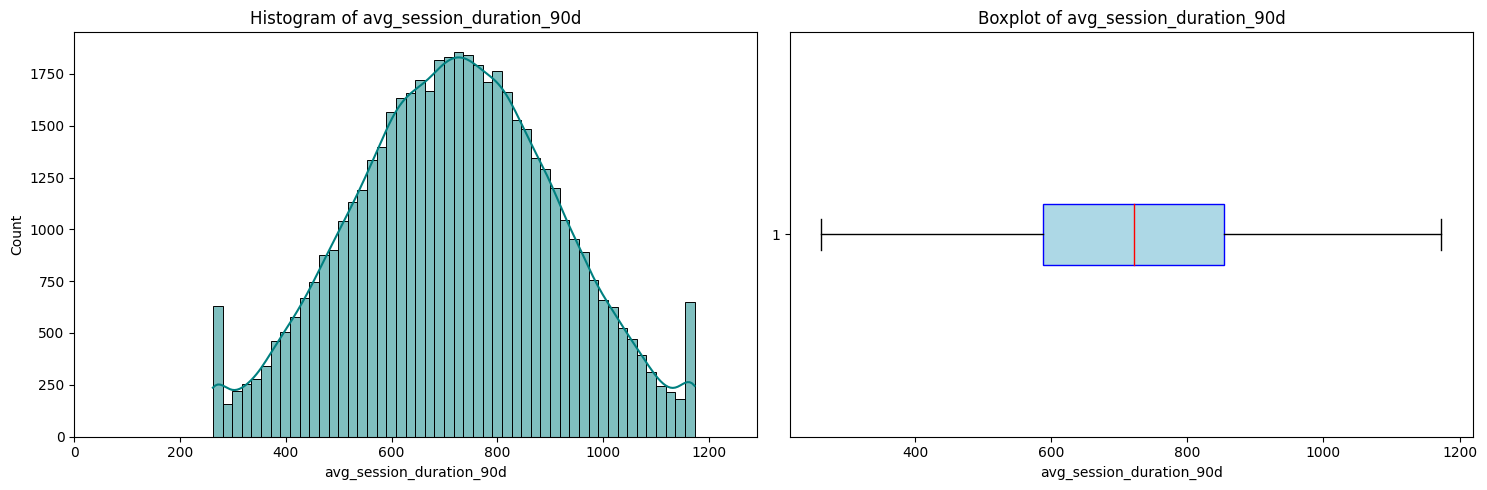

In [31]:
plot_hist_box('avg_session_duration_90d')

In [32]:
clip_feature('median_pages_viewed_30d')

Plot of median_pages_viewed_30d
******


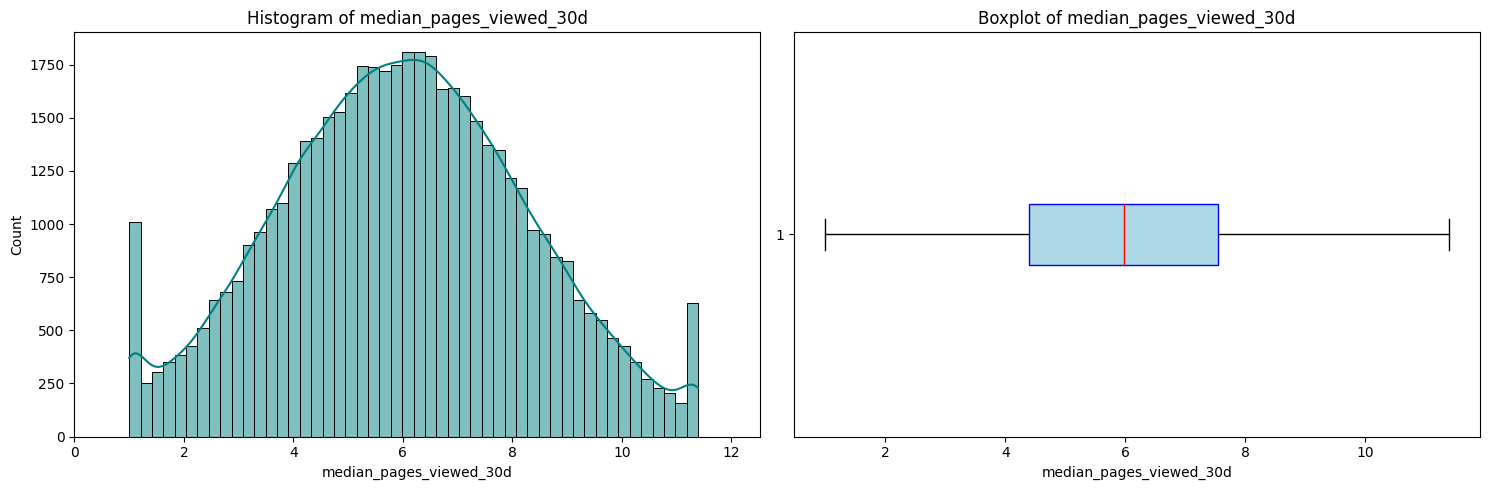

In [33]:
plot_hist_box('median_pages_viewed_30d')

In [34]:
iqr_remove_outlier('search_queries_30d')

Plot of search_queries_30d_iqr
******


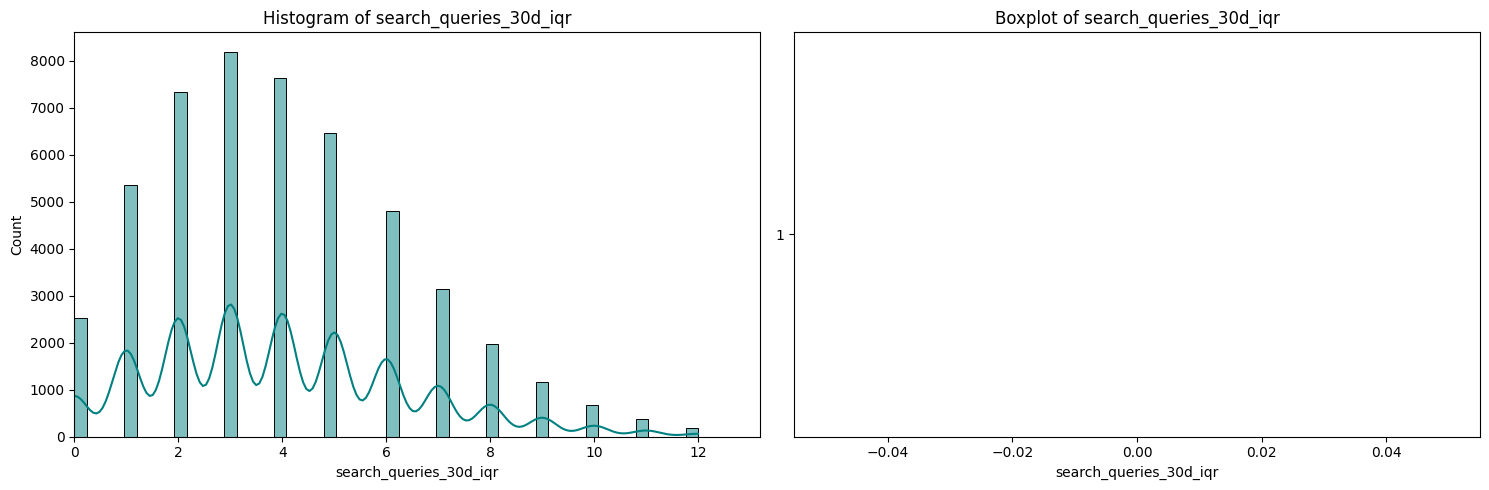

In [35]:
plot_hist_box('search_queries_30d_iqr')

In [36]:
# The feature orders_30d and orders_90d reflect the number of order customer buy, 
# the distribution is right skewed (focus most on [0,2] and [0, 5] respectively)

feature_col['orders_30d'] = feature_col['orders_30d'].clip(upper = 2)
feature_col['orders_90d'] = feature_col['orders_90d'].clip(upper = 5)

In [37]:
clip_feature('aov_2024')

In [38]:
clip_feature('category_diversity_2024')

In [39]:
clip_feature('discount_rate_2024')

In [40]:
# Because most of data focus on value 0 so we can drop column refunds_count+2024 and refund_rate_2024
feature_col.drop(['refunds_count_2024', 'refund_rate_2024'], axis = 1, inplace = True)

In [41]:
feature_col['support_tickets_2024'] = feature_col['support_tickets_2024'].clip(upper = 2)

In [42]:
# The feature avg_csat_2024 and avg_review_stars_2024 have some outlier reflect the fact that users is not satisfied with the service so we wont remove or change this feature

In [43]:
clip_feature('emails_click_rate_90d')

In [44]:
iqr_remove_outlier('review_count_2024')

In [45]:
clip_feature('rfm_frequency')
clip_feature('rfm_monetary')

In [46]:
def plot_correlation_matrix(feature_col):
    corr = feature_col.corr(numeric_only=True)

    cols = list(corr.columns)
    corr = corr.loc[cols, cols]

    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=(14, 10))
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
                annot_kws={"size": 0}, cbar_kws={"shrink": 0.8}, linewidths=0.5)

    plt.xticks(rotation=45, ha='right')  
    plt.yticks(rotation=0)
    plt.title("Correlation Matrix", fontsize=14)
    plt.tight_layout()
    plt.show()

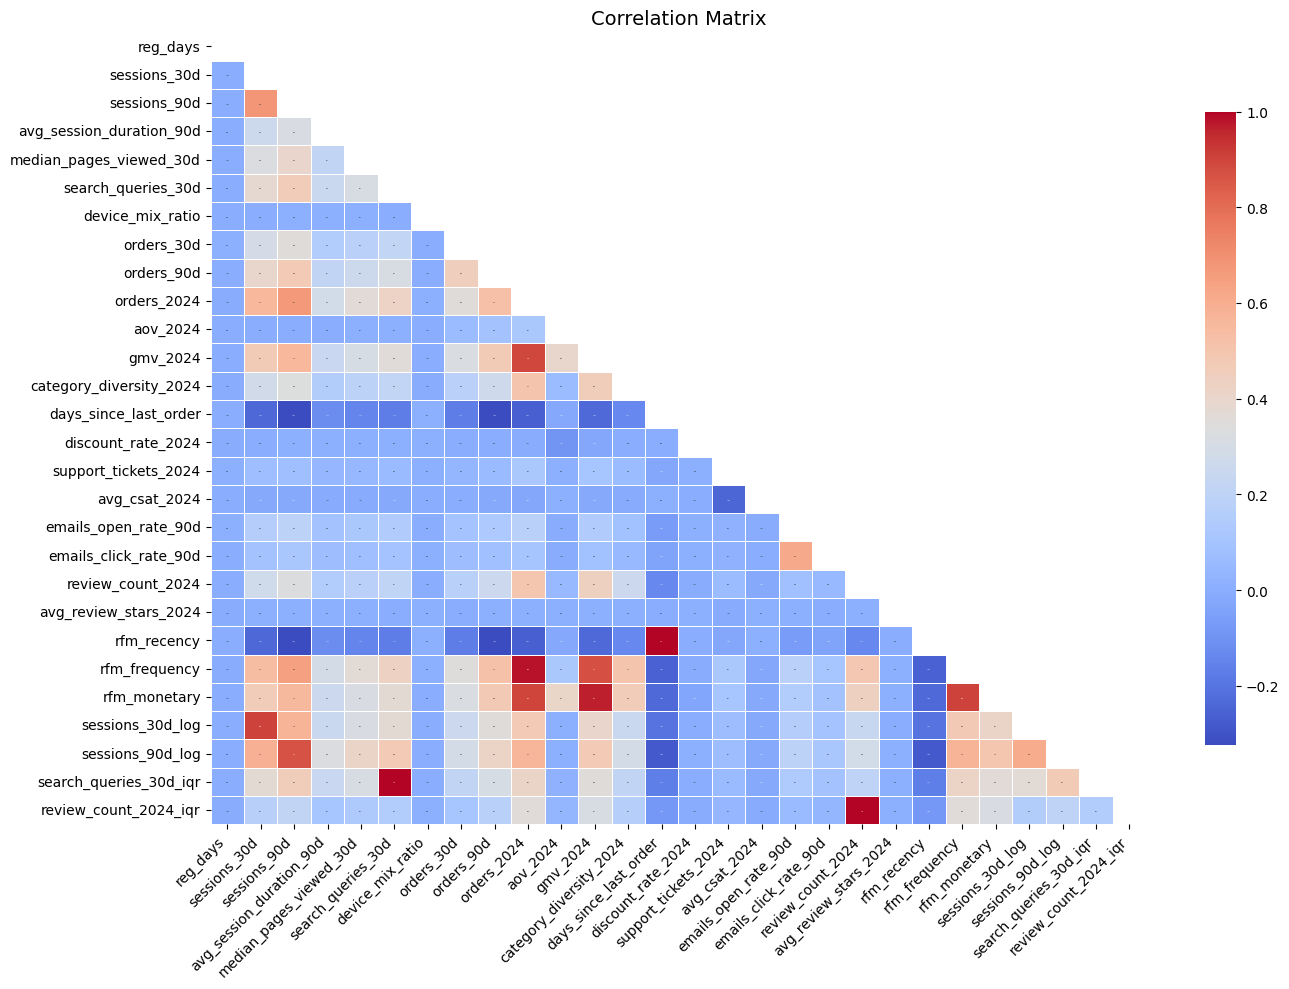

In [47]:
plot_correlation_matrix(feature_col)

Because the features show high correlations specifically, **"days_since_last_order"** with **"rfm_recency"**, **"orders_2024"** with **"rfm_frequency"**, and **"gmv_2024"** with **"rfm_monetary"** so we can safely remove **"orders_2024"**, **"gmv_2024"**, and **"days_since_last_order"** to avoid redundancy.


In [48]:
feature_col.drop(['orders_2024', 'gmv_2024', 'days_since_last_order'], axis = 1, inplace = True)

In [49]:
clean_feature_col = feature_col.drop(['sessions_30d', 'sessions_90d', 'search_queries_30d_iqr',
       'review_count_2024_iqr'], axis = 1 )

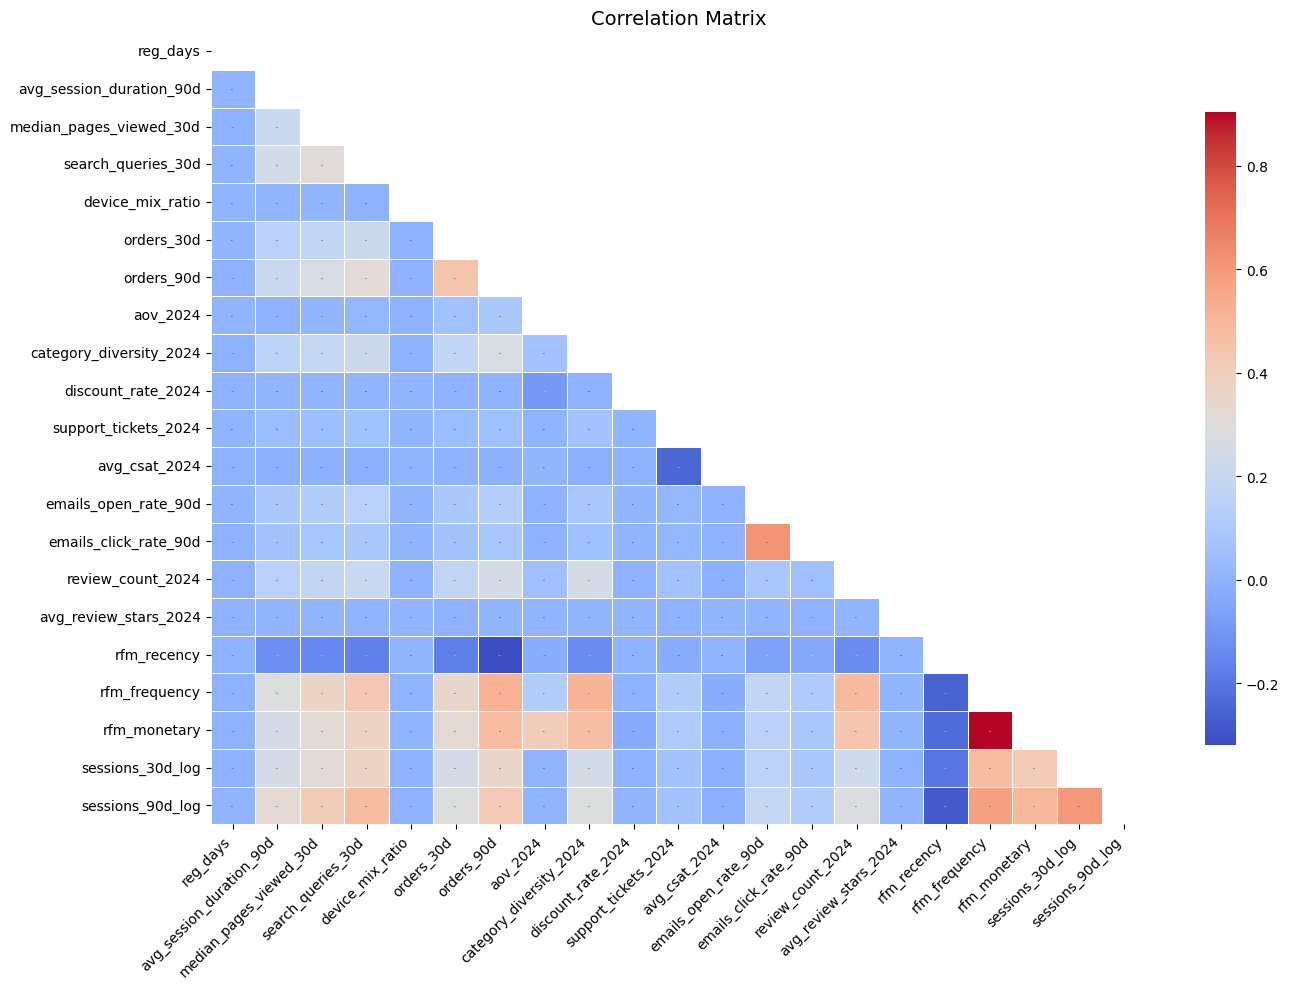

In [50]:
plot_correlation_matrix(clean_feature_col)

C:\Users\Chien\AppData\Local\Temp\ipykernel_51812\2713412260.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


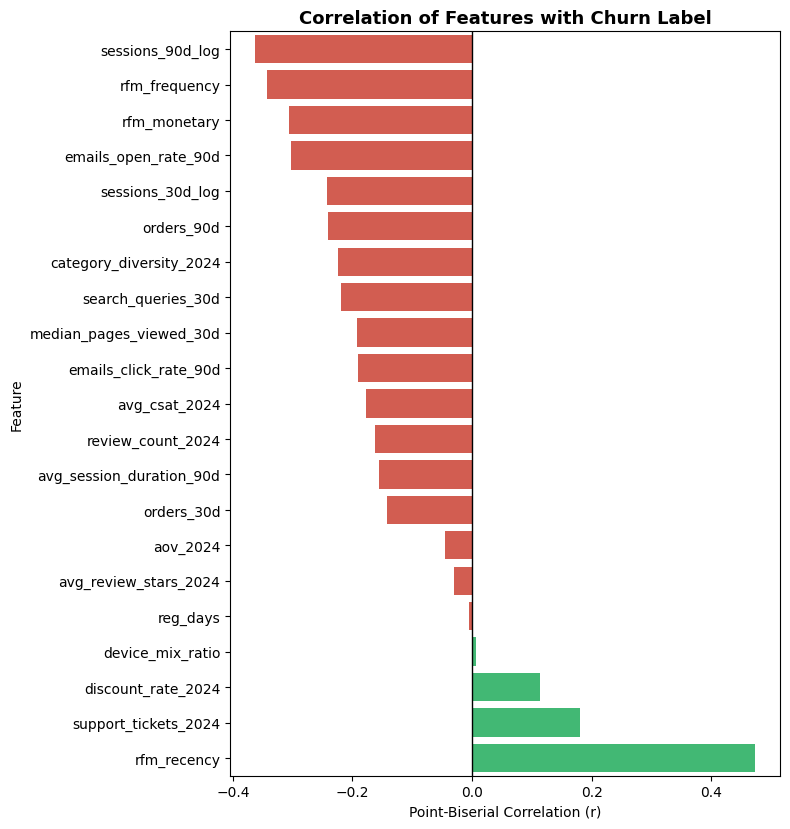

In [51]:
from scipy.stats import pointbiserialr

corrs = {}
for col in clean_feature_col.select_dtypes(include=['number']).columns:
    r, _ = pointbiserialr(target_col, clean_feature_col[col])
    corrs[col] = r

corr_series = pd.Series(corrs).sort_values()

plt.figure(figsize=(8, max(4, len(corr_series) * 0.4)))
sns.barplot(
    x=corr_series.values,
    y=corr_series.index,
    palette=['#e74c3c' if x < 0 else '#2ecc71' for x in corr_series.values]
)

plt.axvline(0, color='black', linewidth=1)
plt.title("Correlation of Features with Churn Label", fontsize=13, fontweight='bold')
plt.xlabel("Point-Biserial Correlation (r)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 2. Modelling

In [52]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import ADASYN
import optuna
from sklearn.metrics import (
    roc_auc_score, precision_score, recall_score, 
    f1_score, average_precision_score, classification_report, roc_curve, auc, confusion_matrix,
    ConfusionMatrixDisplay, precision_recall_curve
)

from sklearn.calibration import calibration_curve
from imblearn.pipeline import Pipeline

In [ ]:
x_train_val, x_test, y_train_val, y_test = train_test_split(clean_feature_col, target_col, test_size=0.2, random_state=42)

In [54]:
def create_params(model_name, trial):
    if model_name == "xgb":
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 500),
            'max_depth': trial.suggest_int('max_depth', 3, 15),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'gamma': trial.suggest_float('gamma', 0, 5),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
            'random_state': 42,
            'eval_metric': 'aucpr',
        }
    elif model_name == "lightgbm":
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 500),
            'max_depth': trial.suggest_int('max_depth', 3, 15),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'min_child_samples': trial.suggest_int('min_child_samples', 1, 50),
            'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
            'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
            'random_state': 42,
            'objective': 'binary',
            'metric': 'average_precision'
        }
    else:
        raise ValueError("model_name must be 'xgb' or 'lightgbm'")
    return params

In [ ]:
def plot_metrics(metrics_history, thresholds, model_name):
    """
    Plot 8 subplots: 4 metrics x 2 (train/val)
    Each subplot shows 5 lines for different thresholds
    """
    metrics_names = ['roc_auc', 'precision', 'recall', 'f1']
    metrics_labels = ['ROC-AUC', 'Precision', 'Recall', 'F1-Score']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle(f'{model_name.upper()} - Training Metrics Across Folds', 
                 fontsize=16, fontweight='bold')
    
    for col_idx, (metric, label) in enumerate(zip(metrics_names, metrics_labels)):
        # Training metrics (top row)
        ax_train = axes[0, col_idx]
        for thresh_idx, threshold in enumerate(thresholds):
            values = metrics_history['train'][threshold][metric]
            folds = range(1, len(values) + 1)
            ax_train.plot(folds, values, marker='o', linewidth=2, 
                         label=f'threshold={threshold}', markersize=2,  
                         color=colors[thresh_idx], alpha=0.8)
        
        ax_train.set_title(f'Training {label}', fontsize=12, fontweight='bold')
        ax_train.set_xlabel('Epochs', fontsize=10)
        ax_train.set_ylabel(label, fontsize=10)
        ax_train.legend(loc='best', fontsize=8)
        ax_train.grid(True, alpha=0.3)
        ax_train.set_ylim([0, 1.05])
        
        # Validation metrics (bottom row)
        ax_val = axes[1, col_idx]
        for thresh_idx, threshold in enumerate(thresholds):
            values = metrics_history['val'][threshold][metric]
            folds = range(1, len(values) + 1)
            ax_val.plot(folds, values, marker='s', linewidth=2, markersize=2,
                       label=f'threshold={threshold}', 
                       color=colors[thresh_idx], alpha=0.8)
        
        ax_val.set_title(f'Validation {label}', fontsize=12, fontweight='bold')
        ax_val.set_xlabel('Epochs', fontsize=10)
        ax_val.set_ylabel(label, fontsize=10)
        ax_val.legend(loc='best', fontsize=8)
        ax_val.grid(True, alpha=0.3)
        ax_val.set_ylim([0, 1.05])
    
    plt.tight_layout()
    plt.savefig(f'metrics/{model_name}_training_metrics.png', dpi=300, bbox_inches='tight')
    plt.show()

In [56]:
def print_metrics_summary(metrics_history, thresholds):
    """
    Print summary statistics for each threshold
    """
    print("\n" + "="*80)
    print("METRICS SUMMARY (Mean ± Std across epochs)")
    print("="*80)
    
    for split in ['train', 'val']:
        print(f"\n{split.upper()} SET:")
        print("-" * 80)
        print(f"{'Threshold':<12} {'ROC-AUC':<18} {'Precision':<18} {'Recall':<18} {'F1-Score':<18}")
        print("-" * 80)
        
        for threshold in thresholds:
            roc_auc = metrics_history[split][threshold]['roc_auc']
            precision = metrics_history[split][threshold]['precision']
            recall = metrics_history[split][threshold]['recall']
            f1 = metrics_history[split][threshold]['f1']
            
            print(f"{threshold:<12.1f} "
                  f"{np.mean(roc_auc):.4f}±{np.std(roc_auc):.4f}    "
                  f"{np.mean(precision):.4f}±{np.std(precision):.4f}    "
                  f"{np.mean(recall):.4f}±{np.std(recall):.4f}    "
                  f"{np.mean(f1):.4f}±{np.std(f1):.4f}")
    
    print("="*80 + "\n")

In [57]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
def build_model(model_name: str, X_train_val, y_train_val, n_trials, n_splits=5, 
                thresholds=[0.3, 0.4, 0.5, 0.6, 0.7]):
    """
    Build model with hyperparameter tuning and comprehensive metrics tracking
    
    Parameters:
    -----------
    model_name : str
        'xgb' or 'lightgbm'
    X_train_val : DataFrame
        Training features
    y_train_val : Series
        Training labels
    n_trials : int
        Number of Optuna trials
    n_splits : int
        Number of CV folds
    thresholds : list
        Classification thresholds to evaluate
    
    Returns:
    --------
    best_pipeline : Pipeline
        Trained pipeline with best parameters
    metrics_history : dict
        Training and validation metrics for all thresholds
    """
    
    if model_name == "xgb":
        model_cls = XGBClassifier
    elif model_name == "lightgbm":
        model_cls = LGBMClassifier
    else:
        raise ValueError("model_name must be 'xgb' or 'lightgbm'")
    
    # Initialize metrics storage
    metrics_history = {
        'train': {t: {'roc_auc': [], 'precision': [], 'recall': [], 'f1': []} 
                  for t in thresholds},
        'val': {t: {'roc_auc': [], 'precision': [], 'recall': [], 'f1': []} 
                for t in thresholds}
    }
    
    def objective(trial):
        params = create_params(model_name, trial)
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        scores = []

        for fold_idx, (train_idx, val_idx) in enumerate(skf.split(X_train_val, y_train_val)):
            X_tr, X_val = X_train_val.iloc[train_idx], X_train_val.iloc[val_idx]
            y_tr, y_val = y_train_val.iloc[train_idx], y_train_val.iloc[val_idx]

            # Pipeline: ADASYN + model
            pipeline = Pipeline([
                ('adasyn', ADASYN(random_state=42)),
                ('clf', model_cls(**params))
            ])

            pipeline.fit(X_tr, y_tr)
            
            # Get probability predictions
            y_train_proba = pipeline.predict_proba(X_tr)[:, 1]
            y_val_proba = pipeline.predict_proba(X_val)[:, 1]
            
            # Calculate metrics for each threshold
            for threshold in thresholds:
                # Training metrics
                y_train_pred = (y_train_proba >= threshold).astype(int)
                metrics_history['train'][threshold]['roc_auc'].append(
                    roc_auc_score(y_tr, y_train_proba)
                )
                metrics_history['train'][threshold]['precision'].append(
                    precision_score(y_tr, y_train_pred, zero_division=0)
                )
                metrics_history['train'][threshold]['recall'].append(
                    recall_score(y_tr, y_train_pred, zero_division=0)
                )
                metrics_history['train'][threshold]['f1'].append(
                    f1_score(y_tr, y_train_pred, zero_division=0)
                )
                
                # Validation metrics
                y_val_pred = (y_val_proba >= threshold).astype(int)
                metrics_history['val'][threshold]['roc_auc'].append(
                    roc_auc_score(y_val, y_val_proba)
                )
                metrics_history['val'][threshold]['precision'].append(
                    precision_score(y_val, y_val_pred, zero_division=0)
                )
                metrics_history['val'][threshold]['recall'].append(
                    recall_score(y_val, y_val_pred, zero_division=0)
                )
                metrics_history['val'][threshold]['f1'].append(
                    f1_score(y_val, y_val_pred, zero_division=0)
                )
            
            # Use average precision for optimization
            scores.append(average_precision_score(y_val, y_val_proba))

        return np.mean(scores)

    # Optuna study
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials, show_progress_bar=True)

    print("Best hyperparameters:", study.best_params)
    print(f"Best Average Precision Score: {study.best_value:.4f}")

    # Train final model with best params
    best_params = study.best_params.copy()
    best_pipeline = Pipeline([
        ('adasyn', ADASYN(random_state=42)),
        ('clf', model_cls(**best_params))
    ])
    best_pipeline.fit(X_train_val, y_train_val)

    # Plot metrics
    plot_metrics(metrics_history, thresholds, model_name)
    
    # Print summary statistics
    print_metrics_summary(metrics_history, thresholds)

    return best_pipeline, metrics_history

## 2.1. XGBOOST

[I 2025-11-23 16:59:59,344] A new study created in memory with name: no-name-27d3ce79-4d71-449d-b964-8f9579df6ffb


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-11-23 17:00:10,603] Trial 0 finished with value: 0.8724812846784307 and parameters: {'n_estimators': 104, 'max_depth': 3, 'learning_rate': 0.04442699415621987, 'subsample': 0.5479926445880821, 'colsample_bytree': 0.6375315420474267, 'gamma': 2.070282348665603, 'min_child_weight': 5}. Best is trial 0 with value: 0.8724812846784307.
[I 2025-11-23 17:00:21,504] Trial 1 finished with value: 0.9029168125603366 and parameters: {'n_estimators': 147, 'max_depth': 5, 'learning_rate': 0.04616915470833335, 'subsample': 0.5330987699358285, 'colsample_bytree': 0.834435980613501, 'gamma': 0.8890633640332535, 'min_child_weight': 10}. Best is trial 1 with value: 0.9029168125603366.
[I 2025-11-23 17:01:03,403] Trial 2 finished with value: 0.9084715519900165 and parameters: {'n_estimators': 432, 'max_depth': 6, 'learning_rate': 0.018469286133232576, 'subsample': 0.7480272226119056, 'colsample_bytree': 0.5688777659956785, 'gamma': 4.7281124796367315, 'min_child_weight': 7}. Best is trial 2 with v

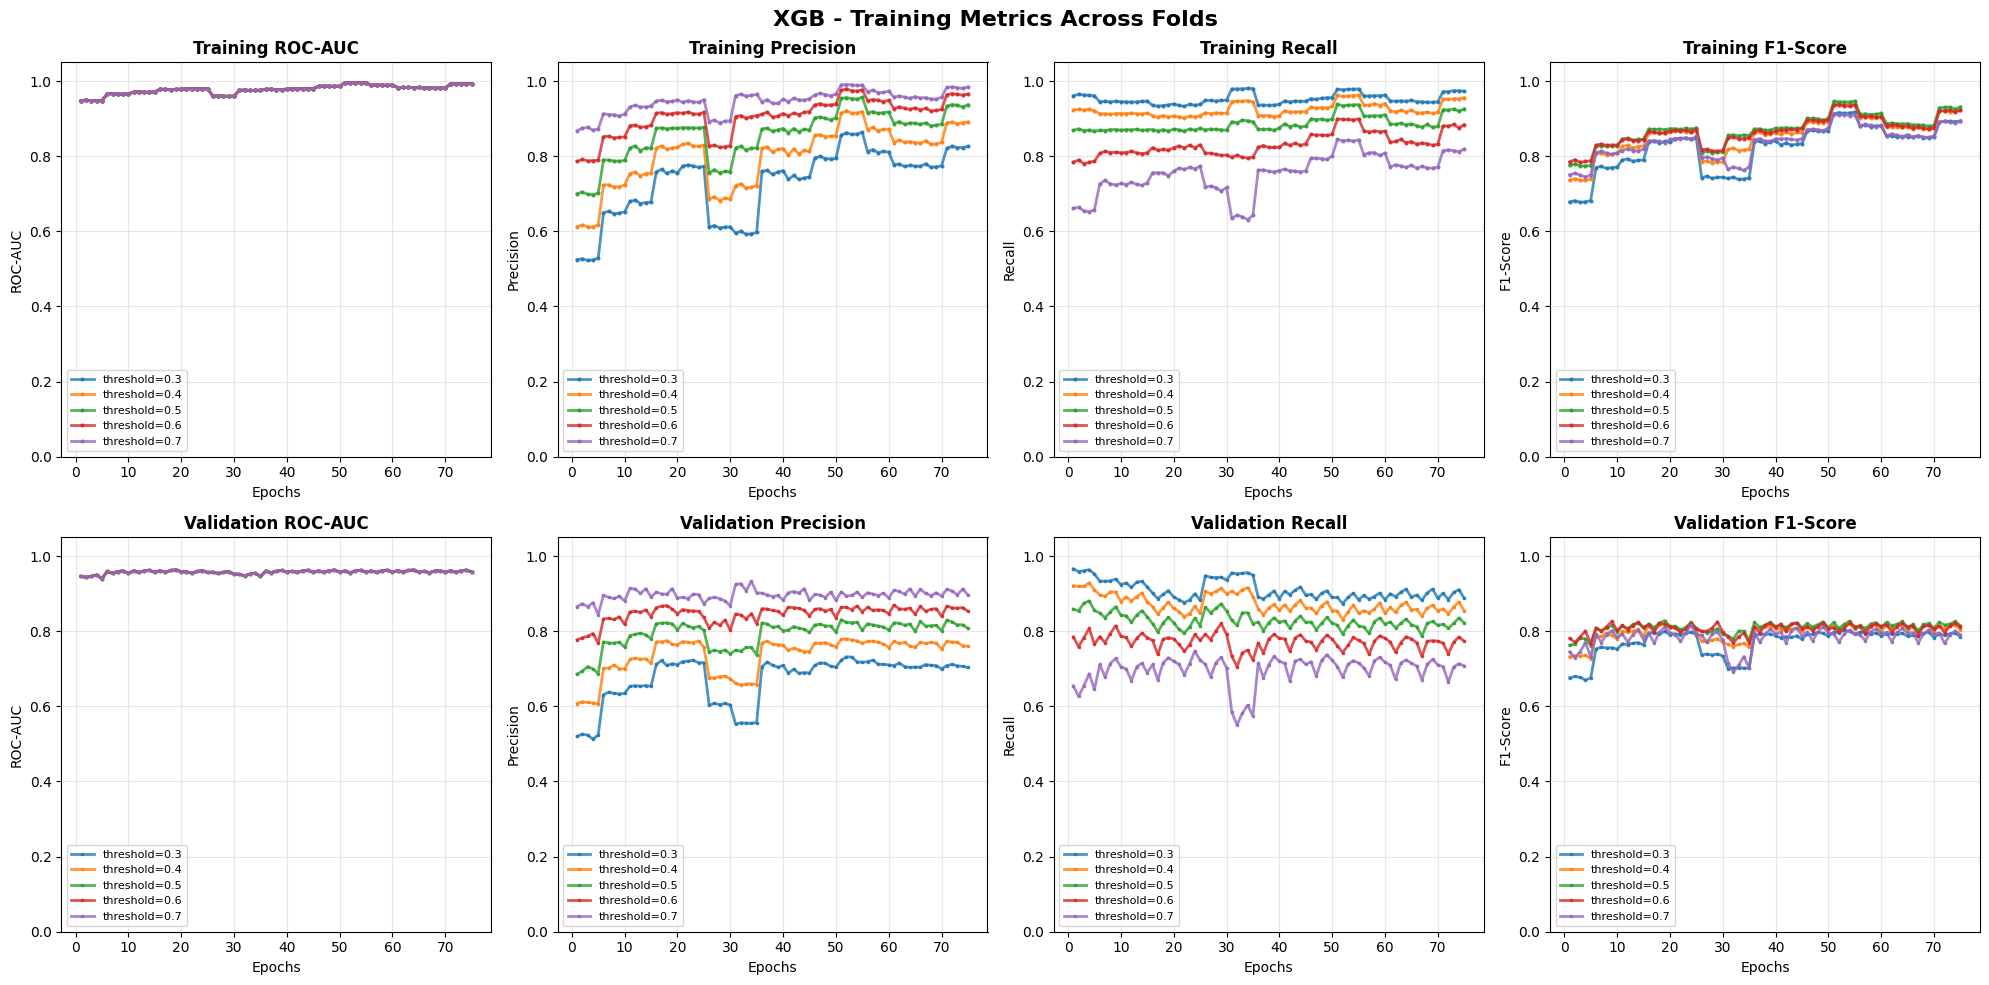


METRICS SUMMARY (Mean ± Std across epochs)

TRAIN SET:
--------------------------------------------------------------------------------
Threshold    ROC-AUC            Precision          Recall             F1-Score          
--------------------------------------------------------------------------------
0.3          0.9777±0.0121    0.7291±0.0922    0.9530±0.0143    0.8226±0.0627
0.4          0.9777±0.0121    0.7990±0.0802    0.9244±0.0170    0.8551±0.0512
0.5          0.9777±0.0121    0.8574±0.0660    0.8866±0.0208    0.8709±0.0427
0.6          0.9777±0.0121    0.9056±0.0490    0.8323±0.0306    0.8672±0.0379
0.7          0.9777±0.0121    0.9455±0.0311    0.7544±0.0534    0.8386±0.0430

VAL SET:
--------------------------------------------------------------------------------
Threshold    ROC-AUC            Precision          Recall             F1-Score          
--------------------------------------------------------------------------------
0.3          0.9576±0.0048    0.6717±0.062

In [58]:
# Train XGBoost model
xgb_pipeline, xgb_metrics = build_model(
    model_name='xgb',
    X_train_val=x_train_val,
    y_train_val=y_train_val,
    n_trials=15,
    n_splits=5,
    thresholds=[0.3, 0.4, 0.5, 0.6, 0.7]
)

## 2.2. LIGHTGBM

[I 2025-11-23 17:07:16,027] A new study created in memory with name: no-name-8799ebd9-d61d-4a34-bef8-5f056ff70dc5


  0%|          | 0/15 [00:00<?, ?it/s]

c:\Users\Chien\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Chien\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\Chien\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Chien\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Chien\AppData\Local\Programs\Python\Python310\lib\subp

[LightGBM] [Info] Number of positive: 23719, number of negative: 23930
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3457
[LightGBM] [Info] Number of data points in the train set: 47649, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497786 -> initscore=-0.008856
[LightGBM] [Info] Start training from score -0.008856
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

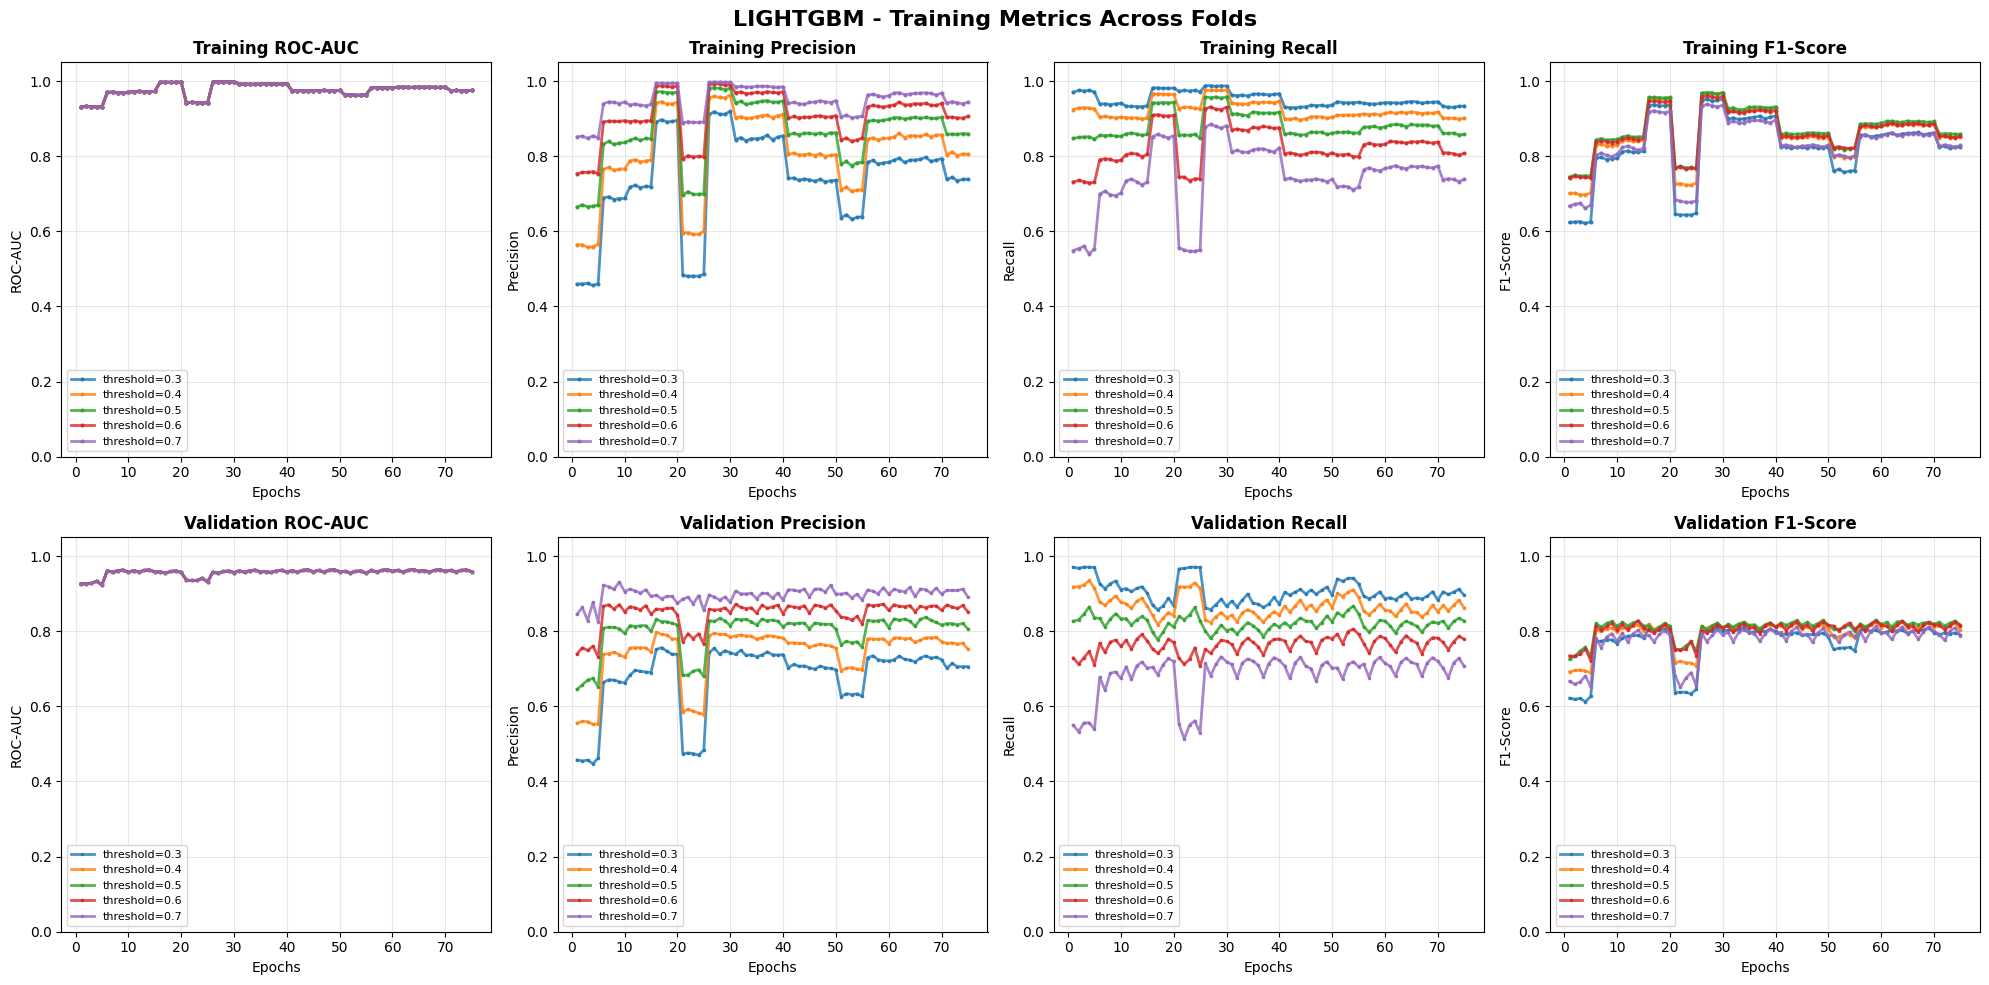


METRICS SUMMARY (Mean ± Std across epochs)

TRAIN SET:
--------------------------------------------------------------------------------
Threshold    ROC-AUC            Precision          Recall             F1-Score          
--------------------------------------------------------------------------------
0.3          0.9756±0.0182    0.7380±0.1274    0.9523±0.0189    0.8249±0.0898
0.4          0.9756±0.0182    0.8069±0.1103    0.9229±0.0231    0.8572±0.0724
0.5          0.9756±0.0182    0.8631±0.0876    0.8821±0.0329    0.8712±0.0600
0.6          0.9756±0.0182    0.9084±0.0647    0.8255±0.0527    0.8648±0.0575
0.7          0.9756±0.0182    0.9476±0.0391    0.7424±0.0895    0.8310±0.0724

VAL SET:
--------------------------------------------------------------------------------
Threshold    ROC-AUC            Precision          Recall             F1-Score          
--------------------------------------------------------------------------------
0.3          0.9561±0.0101    0.6789±0.089

In [59]:
# Train LightGBM model
lightgbm_pipeline, lightgbm_metrics = build_model(
    model_name='lightgbm',
    X_train_val=x_train_val,
    y_train_val=y_train_val,
    n_trials=15,
    n_splits=5,
    thresholds=[0.3, 0.4, 0.5, 0.6, 0.7]
)

*1. Recall-focused (Threshold = 0.4)*

A threshold of **0.4** is chosen to maximize churn detection. With a lower cutoff, the model becomes more sensitive and flags more potential churners. This prioritizes **recall**, which fits businesses that want to avoid missing any at-risk customers—commonly in industries where losing a customer is very costly or retention actions are cheap.

**Validation Metrics @0.4:**
- **Precision:** 0.736 (XGB) / 0.741 (LGBM) — acceptable despite higher false positives.
- **Recall:** 0.874 (XGB) / 0.868 (LGBM) — captures most real churners, aligned with a “catch-all” mindset.
- **F1:** 0.797 (XGB) / 0.796 (LGBM)


---

*2. Precision-focused (Threshold = 0.6)*

A threshold of **0.6** is selected to make churn predictions more confident. The model flags churn only when predicted probability exceeds 0.6, emphasizing **precision**—useful when retention cost is high or resources are limited. This mindset targets fewer customers but with higher correctness.

**Validation Metrics @0.6:**
- **Precision:** 0.846 (XGB) / 0.847 (LGBM) — high confidence in predicted churners.
- **Recall:** 0.772 (XGB) / 0.764 (LGBM) — still captures most churners with a more conservative approach.
- **F1:** 0.807 (XGB) / 0.803 (LGBM)


---

*3. Balanced / F1-focused (Threshold = 0.5)*

A threshold of **0.5** is chosen for a balanced strategy. It provides a middle ground between sensitivity and precision, optimizing **F1-score**. This suits businesses that value both types of errors equally and prefer a stable, all-around predictive behavior.

**Validation Metrics @0.5:**
- **Precision:** 0.793 (XGB) / 0.798 (LGBM) — strong accuracy without over-filtering.
- **Recall:** 0.829 (XGB) / 0.822 (LGBM) — captures most churners with moderate false positives.
- **F1:** 0.809 (XGB) / 0.808 (LGBM) — best overall balance matching a “balanced-risk” mindset.


## 2.3. Stacking Model

In [60]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [61]:
xgb_model = xgb_pipeline.named_steps['clf']

In [62]:
lightgbm_model = lightgbm_pipeline.named_steps['clf']

In [63]:
# features stacking
X_meta_train = np.column_stack([
    xgb_model.predict_proba(x_train_val)[:, 1],
    lightgbm_model.predict_proba(x_train_val)[:, 1]
])

# Meta model
meta_model = LogisticRegression()
meta_model.fit(X_meta_train, y_train_val)
    
X_meta_test = np.column_stack([
    xgb_model.predict_proba(x_test)[:, 1],
    lightgbm_model.predict_proba(x_test)[:, 1]
])
y_pred = meta_model.predict(X_meta_test)

In [64]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9374    0.9481    0.9427      7587
           1     0.8307    0.8011    0.8156      2413

    accuracy                         0.9126     10000
   macro avg     0.8841    0.8746    0.8792     10000
weighted avg     0.9117    0.9126    0.9121     10000



# 3. Evaluation

In [65]:
def evaluate(best_pipeline, x_test, y_test, threshold=0.5):

    # 1. Predict 
    y_pred_proba = best_pipeline.predict_proba(x_test)[:, 1]
    y_pred = (y_pred_proba >= threshold).astype(int)

    # 2. Print report 
    print("\n=== Classification Report ===")
    print(classification_report(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))

    # 3. ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

    # 4. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    # 5. Recall@Top20% & Lift@Top20%
    n = len(y_test)
    top_k = int(0.20 * n)

    # sort by predicted probability descending
    sorted_idx = np.argsort(-y_pred_proba)
    top_idx = sorted_idx[:top_k]

    recall_at_20 = y_test.iloc[top_idx].sum() / y_test.sum()

    # baseline positive rate
    baseline_rate = y_test.mean()
    lift_at_20 = (y_test.iloc[top_idx].mean()) / baseline_rate

    print(f"\nRecall@Top20% = {recall_at_20:.4f}")
    print(f"Lift@Top20% = {lift_at_20:.4f}")

    # Plot Gain (Recall curve)
    gains = []
    percents = np.arange(1, 101)
    sorted_y = y_test.iloc[sorted_idx].values
    total_positives = sorted_y.sum()

    for p in percents:
        k = int(p/100 * n)
        gains.append(sorted_y[:k].sum() / total_positives)

    plt.figure(figsize=(6,5))
    plt.plot(percents, gains)
    plt.axvline(20, color='gray', linestyle='--')
    plt.axhline(gains[19], color='gray', linestyle='--')
    plt.title("Gain Chart")
    plt.xlabel("Top-K (%)")
    plt.ylabel("Recall")
    plt.show()

    # 6. Calibration Plot
    prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)

    plt.figure(figsize=(6,5))
    plt.plot(prob_pred, prob_true, marker='o')
    plt.plot([0,1], [0,1], '--')
    plt.xlabel("Predicted probability")
    plt.ylabel("Observed frequency")
    plt.title("Calibration Plot")
    plt.show()

    return {
        "f1": f1_score(y_test, y_pred),
        "roc_auc": roc_auc,
        "recall_at_20": recall_at_20,
        "lift_at_20": lift_at_20
    }


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7587
           1       0.83      0.82      0.82      2413

    accuracy                           0.91     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.91      0.91      0.91     10000

F1-score: 0.8216666666666667


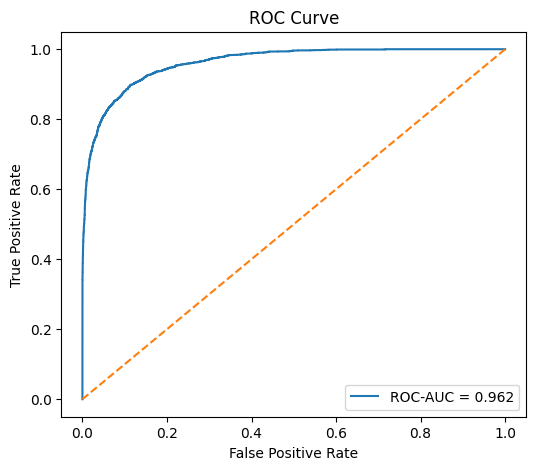

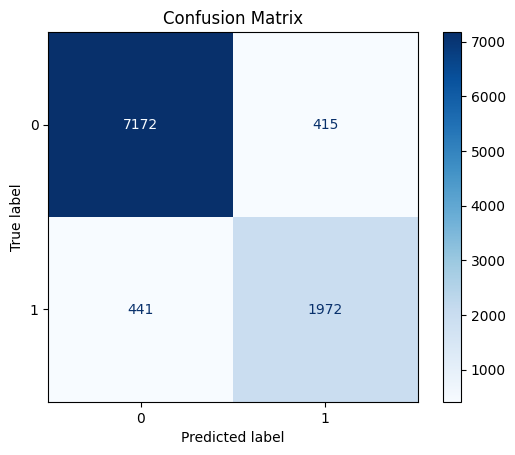


Recall@Top20% = 0.7397
Lift@Top20% = 3.6987


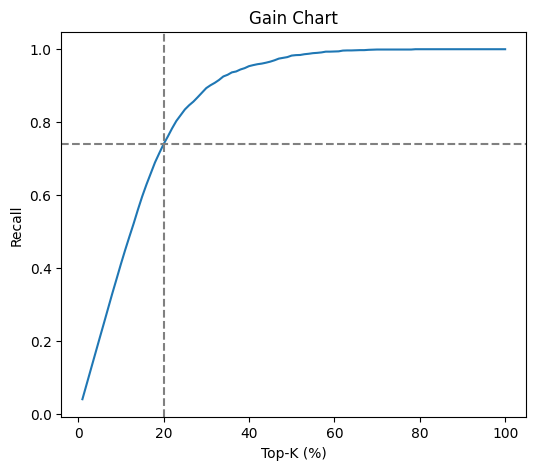

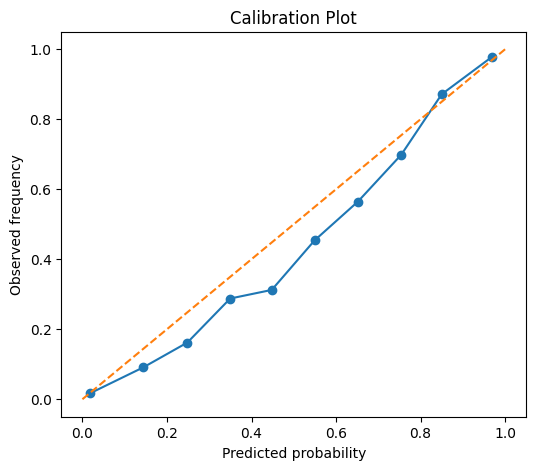

{'f1': 0.8216666666666667,
 'roc_auc': 0.9617289012314181,
 'recall_at_20': 0.7397430584334853,
 'lift_at_20': 3.6987152921674267}

In [72]:
evaluate(xgb_pipeline, x_test, y_test, threshold=0.5)


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7587
           1       0.87      0.77      0.81      2413

    accuracy                           0.92     10000
   macro avg       0.90      0.86      0.88     10000
weighted avg       0.91      0.92      0.91     10000

F1-score: 0.8149944873208379


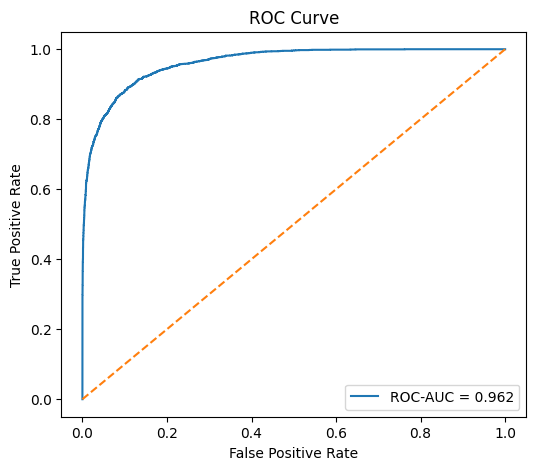

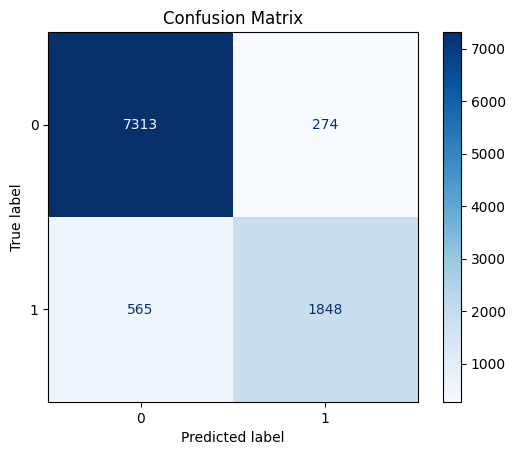


Recall@Top20% = 0.7406
Lift@Top20% = 3.7029


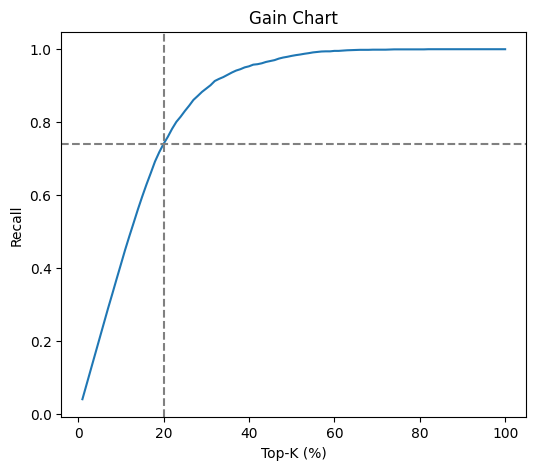

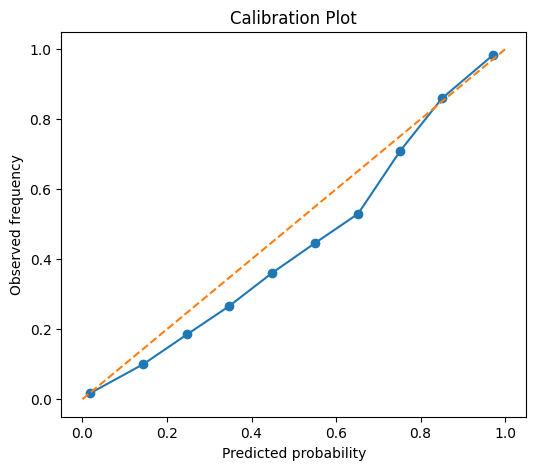

{'f1': 0.8149944873208379,
 'roc_auc': 0.9621966621095007,
 'recall_at_20': 0.740571902196436,
 'lift_at_20': 3.70285951098218}

In [73]:
evaluate(lightgbm_pipeline, x_test, y_test, threshold=0.6)


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      7587
           1       0.75      0.87      0.81      2413

    accuracy                           0.90     10000
   macro avg       0.85      0.89      0.87     10000
weighted avg       0.91      0.90      0.90     10000

F1-score: 0.8062727098871677


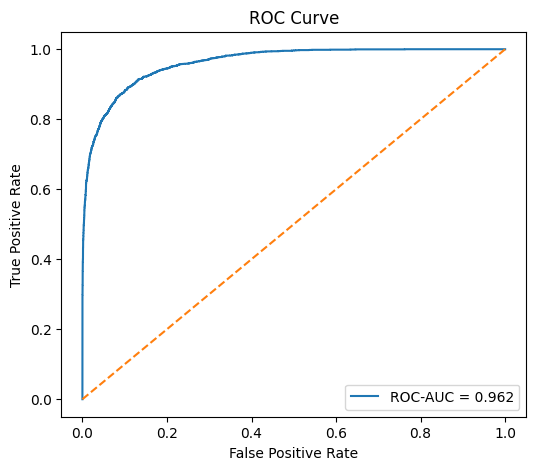

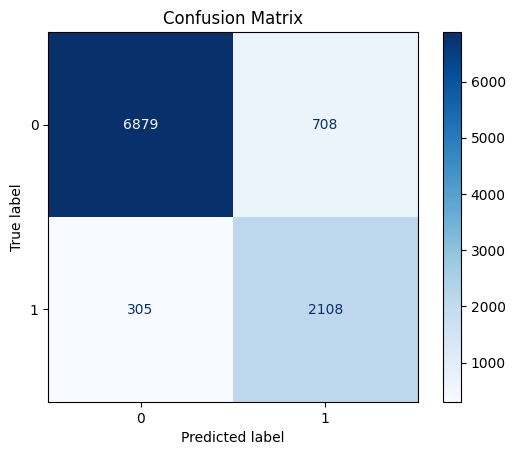


Recall@Top20% = 0.7406
Lift@Top20% = 3.7029


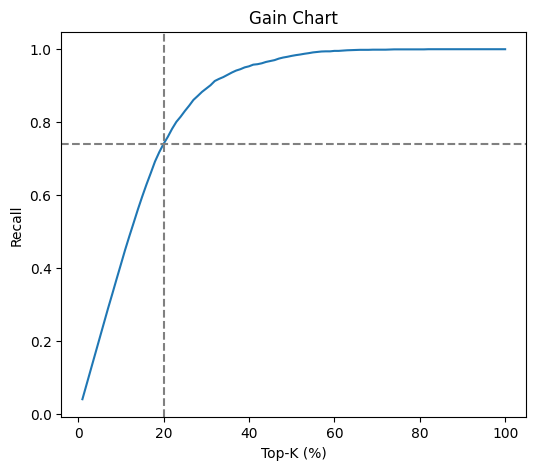

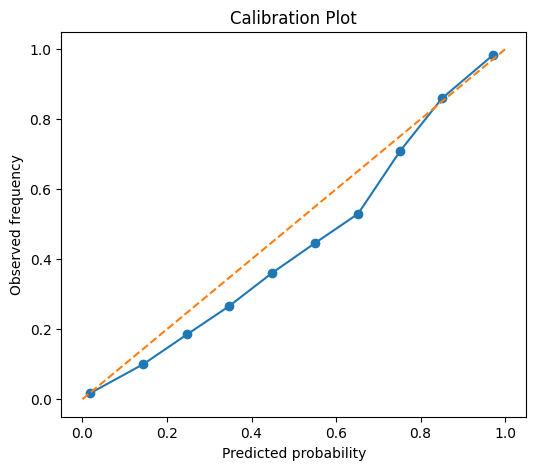

{'f1': 0.8062727098871677,
 'roc_auc': 0.9621966621095007,
 'recall_at_20': 0.740571902196436,
 'lift_at_20': 3.70285951098218}

In [74]:
evaluate(lightgbm_pipeline, x_test, y_test, threshold=0.35)

# 4. Model Explanation

In [75]:
import shap

In [76]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x_test)  

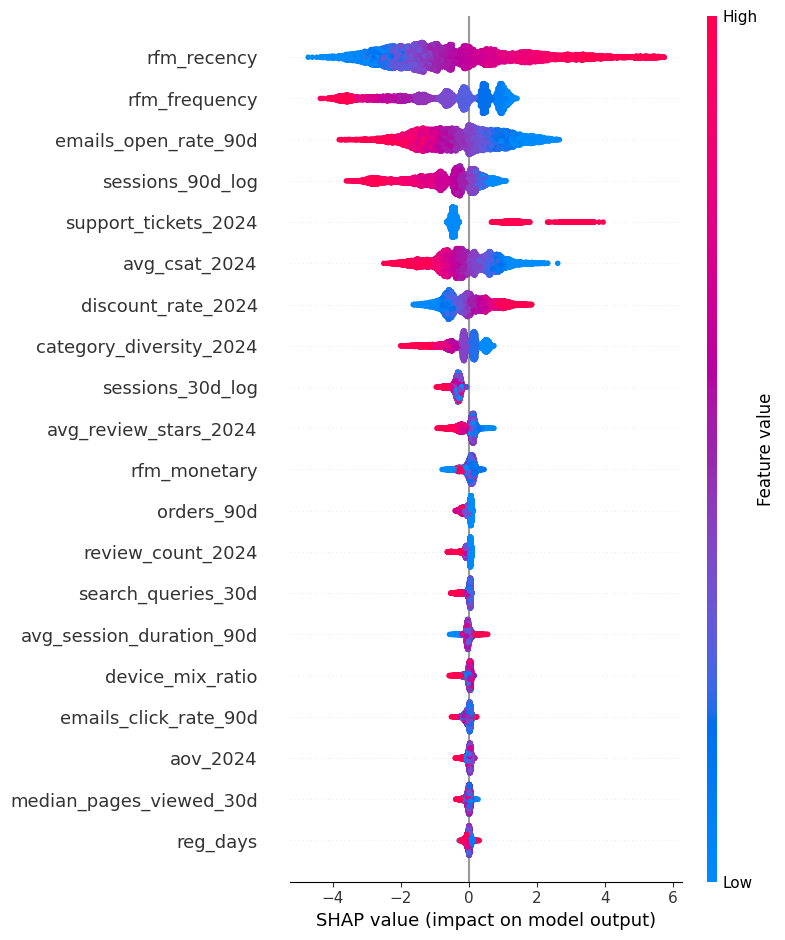

In [78]:
shap.summary_plot(shap_values, x_test)

**Model Explanation (SHAP Analysis)**

The SHAP summary plot shows the contribution of each feature to the churn prediction model. Key insights include:

- **Top Features:**
  - **rfm_recency:** Customers who have interacted more recently (lower recency) are much less likely to churn, while high recency values (long time since last activity) increase churn risk.
  - **rfm_frequency:** Frequent customers tend to stay, whereas low frequency is associated with higher churn.
  - **emails_open_rate_90d:** High email engagement is negatively associated with churn, indicating that customers opening more emails are less likely to leave.
  - **sessions_90d_log:** Higher session counts over 90 days reduce churn likelihood.
  - **support_tickets_2024:** Customers with more support tickets in 2024 have mixed impact, suggesting some support interactions may indicate churn risk while others do not.

- **Medium Importance Features:**
  - **avg_csat_2024, discount_rate_2024, category_diversity_2024:** Affect churn moderately. For example, higher satisfaction reduces churn, while high discount usage may slightly increase churn risk.

- **Lower Impact Features:**
  - **orders_30d, aov_2024, avg_session_duration_90d, median_pages_viewed_30d:** Have minimal impact on the model predictions.

- **General Observations:**
  - Features related to **recency, frequency, and engagement** are the most predictive of churn.
  - Higher feature values (shown in red) generally indicate higher churn probability for risk-related features, while lower values (blue) indicate retention.
  - The distribution of SHAP values demonstrates that the model captures nonlinear interactions and varying impact of features across the customer base.

- **Conclusion:**
  - The model relies heavily on customer activity and engagement patterns to predict churn. Retention strategies should prioritize:
    - Recently active customers
    - Frequent customers
    - Highly engaged customers
  - While also identifying high-risk users with:
    - Low activity
    - Low engagement
    - High support interactions